# 당뇨병 위험 분류 예측 프로젝트(입문)

## 스테이지 1

### 1. 데이터 읽어오기

In [1]:
import pandas as pd

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

### 2. 상위 3개 행 데이터 확인하기

In [2]:
train.head(3)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0


### 3. 하위 3개 행 데이터 확인하기

In [3]:
train.tail(3)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0
651,TRAIN_651,1,107,68,19,0,26.5,0.165,24,0


### 4. 제출 파일 확인하기

In [4]:
submission.head(4)

,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0


### 5. csv 파일 저장

In [5]:
submission.to_csv('data/diabete/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

## 스테이지 2

### 1. 데이터 정보 확인

아래 결과를 확인해보면 결측값이 없다는 것을 알 수 있다. 또한 ID 피처를 제외한 나머지 피처가 숫자형 피처인 것을 알 수 있다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


### 2. 데이터 기술통계량 확인

In [7]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


아래에서 피처를 대괄호 2개로 감싼 이유는 데이터프레임으로 출력하기 위함이다. 대괄호 1개로 감싸면 시리즈 형태의 데이터가 출력된다.

In [8]:
train[['BloodPressure']].describe()

,BloodPressure
count,652.000000
mean,68.895706
std,19.183843
min,0.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,114.000000


### 3. 무작위 샘플 데이터 추출하기

In [9]:
train.sample(10)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
222,TRAIN_222,4,115,72,0,0,28.9,0.376,46,1
651,TRAIN_651,1,107,68,19,0,26.5,0.165,24,0
284,TRAIN_284,3,120,70,30,135,42.9,0.452,30,0
292,TRAIN_292,4,134,72,0,0,23.8,0.277,60,1
375,TRAIN_375,5,187,76,27,207,43.6,1.034,53,1
562,TRAIN_562,7,195,70,33,145,25.1,0.163,55,1
277,TRAIN_277,1,125,50,40,167,33.3,0.962,28,1
381,TRAIN_381,6,129,90,7,326,19.6,0.582,60,0
368,TRAIN_368,4,142,86,0,0,44.0,0.645,22,1
112,TRAIN_112,0,137,68,14,148,24.8,0.143,21,0


In [10]:
train.sample(2)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
637,TRAIN_637,13,152,90,33,29,26.8,0.731,43,1
409,TRAIN_409,4,110,76,20,100,28.4,0.118,27,0


## 스테이지 3

### 1. 인덱스 추출하기

train 데이터의 상위 10개 행(row) 데이터의 인덱스(index)를 추출해보자

In [11]:
list(train.index)[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 2. 값 추출하기

In [12]:
train.values

array([['TRAIN_000', 4, 103, ..., 0.966, 33, 0],
       ['TRAIN_001', 10, 133, ..., 0.245, 36, 0],
       ['TRAIN_002', 4, 112, ..., 0.236, 38, 0],
       ...,
       ['TRAIN_649', 8, 84, ..., 0.457, 39, 0],
       ['TRAIN_650', 2, 81, ..., 0.547, 25, 0],
       ['TRAIN_651', 1, 107, ..., 0.165, 24, 0]], dtype=object)

### 3. Age 피처의 값 잘라내기

In [13]:
train_age = train['Age'].values
train_age[:10]

array([33, 36, 38, 26, 21, 26, 23, 42, 21, 33], dtype=int64)

### 4. 피처의 데이터 타입 확인

In [14]:
train['Age'].dtypes

dtype('int64')

### 5. 피처의 데이터 타입 변환

In [15]:
train['Age'].astype('float')

0      33.0
1      36.0
2      38.0
3      26.0
4      21.0
       ... 
647    21.0
648    41.0
649    39.0
650    25.0
651    24.0
Name: Age, Length: 652, dtype: float64

### 6.BMI 피처의 데이터 타입 변환

In [16]:
bmi_int = train['BMI'].astype('int').dtype
bmi_int

dtype('int32')

## 스테이지 4

### 1. iloc 메서드를 활용한 데이터 읽어오기

In [17]:
train.iloc[[1]]

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0


In [18]:
train.iloc[1:4]

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0


### 2. 범위를 지정하여 행 데이터 읽어오기

아래 역시 데이터프레임 형태로 나오기 위해 대괄호 2개 사용

In [19]:
train_bloodpressure = train.iloc[3:7][['BloodPressure']]
train_bloodpressure

,BloodPressure
3,88
4,66
5,50
6,54


### 3. loc 메서드를 활용한 단일 행 데이터 읽어오기

In [20]:
train.loc[3:5]

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
5,TRAIN_005,3,78,50,32,88,31.0,0.248,26,1


### 4. loc 메서드를 활용한 데이터 필터링 및 값 변경

In [21]:
print('Glucose 피처의 값이 170 이상인 수 : ',len(train[train['Glucose'] >= 170]))

train.loc[train['Glucose'] >= 170, 'Glucose'] = 169

print('Glucose 피처의 값이 170 이상인 수 : ',len(train[train['Glucose'] >= 170]))

Glucose 피처의 값이 170 이상인 수 :  57
Glucose 피처의 값이 170 이상인 수 :  0


In [22]:
copy_train = train.copy()

copy_train.loc[copy_train['Pregnancies'] >= 14, 'Pregnancies'] = 13

print(len(copy_train[copy_train['Pregnancies']==13]))

13


## 스테이지 5

### 1. Outcome 피처 클래스별 빈도 확인

In [23]:
train['Outcome'].value_counts()

Outcome
0    424
1    228
Name: count, dtype: int64

### 2. Outcome 피처 클래시별 비율 확인

value_counts() 메서드의 normalize 인자의 값을 True로 설정하여 각 클래스별 등장 비율 확인 가능

In [24]:
train['Outcome'].value_counts(normalize = True)

Outcome
0    0.650307
1    0.349693
Name: proportion, dtype: float64

### 3. BloodPressure 열 값을 3개 구간으로 분류하기

pd.cut() 함수를 사용해서 새로운 피처(feature) bloodpressure_cut 을 만들어 보자

In [27]:
train['bloodpressure_cut'] = pd.cut(train['BloodPressure'], bins = 3, labels = ['A', 'B', 'C'])
train['bloodpressure_cut'].value_counts()

bloodpressure_cut
B    409
C    209
A     34
Name: count, dtype: int64

### 4. BloodPressure 피처에 직접 범위를 설정해 구간별 분류하기

각 구간의 최댓값을 포함하고 싶다면 right 인자를 True로 둔다.

value_counts() 메서드에 sort = False 인자를 넣어주면 졍렬되지 않고 나온다

In [30]:
train['bloodpressure_cut'] = pd.cut(
    train['BloodPressure'], 
    bins = [0, 40, 80, 120],
    labels = ['A', 'B', 'C'], 
    right = False
)

print(train['bloodpressure_cut'].value_counts(sort = False))

print('혈압이 40 미만인 값 : ', 
    len(train[train['BloodPressure'] < 40]))
print('혈압이 40이상 80미만인 값 : ',
    len(train[(train['BloodPressure'] >= 40) & (train['BloodPressure'] < 80)]))
print('혈압이 80이상인 값 : ',
    len(train[(train['BloodPressure'] >= 80) & (train['BloodPressure'] < 120)]))

bloodpressure_cut
A     34
B    449
C    169
Name: count, dtype: int64
혈압이 40 미만인 값 :  34
혈압이 40이상 80미만인 값 :  449
혈압이 80이상인 값 :  169


### 5. 분위수를 사용하여 BloodPressure 데이터를 4개의 구간으로 분류하기

pd.qcut() 함수는 분위 수를 기준으로 데이터를 나누어 각 구간에 동일한 수의 데이터가 포함되도록 한다.

즉, 데이터의 분포를 고려하여 구간을 생성하기 때문에, pd.cut() 함수와 다르게 각 구간의 길이가 균등하지 않을 수 있다

요약하자면,
* pd.cut 데이터의 분포를 고려하지 않고 구간의 길이를 동일하게 설정
* pd.qcut 데이터의 분포를 고려하여 구간의 길이가 균등하지 않을 수 있음

pd.qcut()를 이용하여 피처를 4개 구간으로 나누어 보자

In [31]:
train['bloodpressure_cut'] = pd.qcut(train['BloodPressure'], q = 4, labels = ['A', 'B', 'C', 'D'])
train['bloodpressure_cut'].value_counts(sort = False)

bloodpressure_cut
A    201
B    158
C    159
D    134
Name: count, dtype: int64

### 6. Glucose 피처에 직접 범위를 설정하여 구간별 분류하기

In [32]:
train['glucose_cut'] = pd.cut(train['Glucose'],
                             bins = [0, 100, 200],
                             labels = ['normal', 'suspected'],
                             right = False)

train['glucose_cut'].value_counts()

glucose_cut
suspected    481
normal       171
Name: count, dtype: int64

### 7. StandardScaler를 이용한 train 데이터 표준화

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train.loc[:,'Pregnancies':'Age'])

StandardScaler()

In [41]:
scaled_train = scaler.transform(train.loc[:, 'Pregnancies':'Age'])
scaled_test = scaler.transform(test.loc[:, 'Pregnancies':'Age'])

sequential_features = scaler.feature_names_in_

for index, feature in enumerate(sequential_features):
    train[feature] = scaled_train[:, index]
    test[feature] = scaled_test[:, index]

train.head()

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bloodpressure_cut,glucose_cut
0,TRAIN_000,0.023064,-0.563969,-0.464064,0.789608,0.944442,-1.066013,1.521265,-0.043225,0,A,suspected
1,TRAIN_001,1.827588,0.449465,-0.046726,-1.285030,-0.687406,-0.663612,-0.668604,0.210673,0,B,suspected
2,TRAIN_002,0.023064,-0.259938,0.474946,1.229683,-0.687406,0.999645,-0.695939,0.379939,0,C,suspected
3,TRAIN_003,-0.879198,-0.023471,0.996618,1.292551,0.757460,1.791034,0.127160,-0.635655,0,D,suspected
4,TRAIN_004,-0.879198,-0.192376,-0.151061,0.978212,1.012436,0.825272,-0.534964,-1.058819,0,B,suspected


## 스테이지 6

### 1. 데이터 읽어오기

In [44]:
import pandas as pd

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

### 2. 독립변수와 종속변수 설정

In [45]:
x_train = train.drop(['ID', 'Outcome'], axis = 1)
y_train = train['Outcome']

x_test = test.drop('ID', axis = 1)

### 3. Glucose 피처에 직접 범위를 설정해 구간별 분류하기

In [46]:
x_train['binning_glucose'] = pd.cut(
    x_train['Glucose'],
    bins = [0, 100, 200],
    labels = ['normal', 'suspected'],
    right = False)

x_test['binning_glucose'] = pd.cut(
    x_test['Glucose'],
    bins = [0, 100, 200],
    labels = ['normal', 'suspected'],
    right = False
)

### 4. StandardScaler를 이용한 train 데이터 표준화

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train.loc[:, 'Pregnancies':'Age'])

StandardScaler()

In [57]:
scaled_train = scaler.transform(x_train.loc[:,'Pregnancies':'Age'])
scaled_test = scaler.transform(x_test.loc[:,'Pregnancies':'Age'])

sequential_features = scaler.feature_names_in_

for index, feature in enumerate(sequential_features):
    x_train[feature] = scaled_train[:,index]
    x_test[feature] = scaled_test[:,index]

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,binning_glucose
0,0.023064,-0.561386,-0.464064,0.789608,0.944442,-1.066013,1.521265,-0.043225,suspected
1,1.827588,0.377056,-0.046726,-1.285030,-0.687406,-0.663612,-0.668604,0.210673,suspected
2,0.023064,-0.279854,0.474946,1.229683,-0.687406,0.999645,-0.695939,0.379939,suspected
3,-0.879198,-0.060884,0.996618,1.292551,0.757460,1.791034,0.127160,-0.635655,suspected
4,-0.879198,-0.217291,-0.151061,0.978212,1.012436,0.825272,-0.534964,-1.058819,suspected


### 5. LabelEncoder를 활용한 범주형 데이터 인코딩

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le = le.fit(x_train['binning_glucose'])
x_train['binning_glucose'] = le.transform(x_train['binning_glucose'])

In [63]:
import numpy as np

for label in x_test['binning_glucose']:
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

x_test['binning_glucose'] = le.transform(x_test['binning_glucose'])

### 6. 로지스틱 회귀 모델 정의

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### 7. 로지스틱 회귀 모델 학습 및 예측

In [65]:
model.fit(x_train, y_train)

predict= model.predict(x_test)

### 8. 예측값을 csv 파일로 저장하기

In [66]:
submission['Outcome'] = predict

submission.to_csv('data/diabete/submission.csv', index=False, quoting=2, encoding="utf-8-sig", na_rep=0, float_format='%.6f')

# 당뇨병 위험 분류 예측 프로젝트(중급)

* Pregnancies : 임신횟수
* Glucose : 포도당 농도
* BloodPressure : 혈압
* SkinThickness : 피부두께
* Insulin : 인슐린
* BMI : 체질량지수
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 당뇨병 여부(0: 발병되지 않음, 1: 발병)

## 스테이지 1. 이진 분류 문제 초기 데이터 탐색

### 1. 데이터 불러오기

In [1]:
import pandas as pd

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

display(train.head())
display(test.head())
display(submission.head())

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,0,0,37.8,0.261,41
1,TEST_001,3,107,62,13,48,22.9,0.678,23
2,TEST_002,3,113,44,13,0,22.4,0.140,22
3,TEST_003,6,190,92,0,0,35.5,0.278,66
4,TEST_004,1,107,72,30,82,30.8,0.821,24


,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


Outcome 컬럼은 우리가 예측해야 할 대상이다.

### 2. 데이터 정보 확인

10개의 컬럼과 652개의 비결측치 데이터를 가지고 있다.

In [3]:
display(train.info())
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        652 non-null    object 
 1   Pregnancies               652 non-null    int64  
 2   Glucose                   652 non-null    int64  
 3   BloodPressure             652 non-null    int64  
 4   SkinThickness             652 non-null    int64  
 5   Insulin                   652 non-null    int64  
 6   BMI                       652 non-null    float64
 7   DiabetesPedigreeFunction  652 non-null    float64
 8   Age                       652 non-null    int64  
 9   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 51.1+ KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,3.923313,120.946319,68.895706,20.440184,80.878834,31.947393,0.465133,33.510736,0.349693
std,3.327529,31.992394,19.183843,15.918604,117.748315,7.460975,0.329496,11.824817,0.477239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.238750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.363000,29.500000,0.000000
75%,6.000000,142.000000,80.000000,32.000000,126.000000,36.425000,0.607750,41.000000,1.000000
max,15.000000,199.000000,114.000000,99.000000,846.000000,57.300000,2.329000,81.000000,1.000000


### 3. Target 변수 class별 갯수 및 비율구하기

타겟 변수의 클래스 비율을 확인한 결과, 0이 65%를 차지했다. 이진 분류 문제에서는 클래스 모델이 불균형하면 모델이 특정 클래스를 선호하는 경향을 보일 수 있어 오버샘플링 혹은 언더샘플링을 할 필요가 있다.

In [2]:
target_counts = train['Outcome'].value_counts()
target_ratio = train['Outcome'].value_counts(normalize=True)

print(f"target_counts ['0'] = {target_counts[0]}  target_counts ['1'] = {target_counts[1]}")
print(f"target_ratio ['0'] = {round(target_ratio[0]*100,2)} %  target_ratio ['1'] = {round(target_ratio[1]*100)} %")

target_counts ['0'] = 424  target_counts ['1'] = 228
target_ratio ['0'] = 65.03 %  target_ratio ['1'] = 35 %


### 4. 제출 데이터 확인하기

Outcome 컬럼에 당뇨병 발병 여부를 예측하여 값을 넣어주는 것이 이 프로젝트의 최종 미션인 것을 확인할 수 있다.

In [3]:
submission.head(4)

,ID,Outcome
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0


### 5. 제출 파일 저장하기

In [5]:
submission.to_csv('data/diabete/submission.csv', index = False)

## 스테이지 2. 탐색적 데이터 분석을 통해 데이터 이해하기

### 1. 데이터 읽어오기

In [6]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

### 2. Target 변수 class별 빈도수 및 비율 시각화

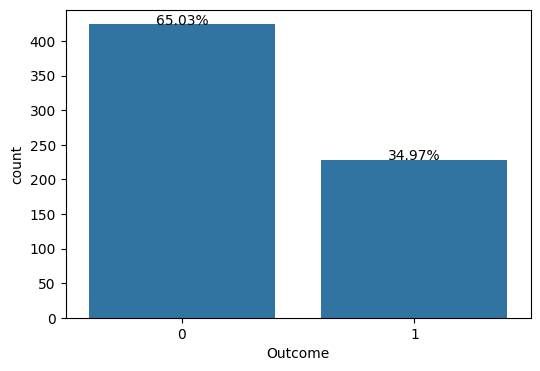

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#  target ratio 계산
target_ratio = round(train['Outcome'].value_counts(normalize=True) * 100, 2)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Outcome', data=train)

# Annotate the bars with the percentage values
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2.,
            height,
            '{:.2f}%'.format(target_ratio[i]),
            ha="center")

plt.show()

### 3. feature 변수의 분포 확인

'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction', 'Age' 등의 피처는 왜도가 있는 분포를 보인다.

왜도가 높은 피처는 로그 변환 등을 통해 정규분포에 가깝게 만들 수 있다.

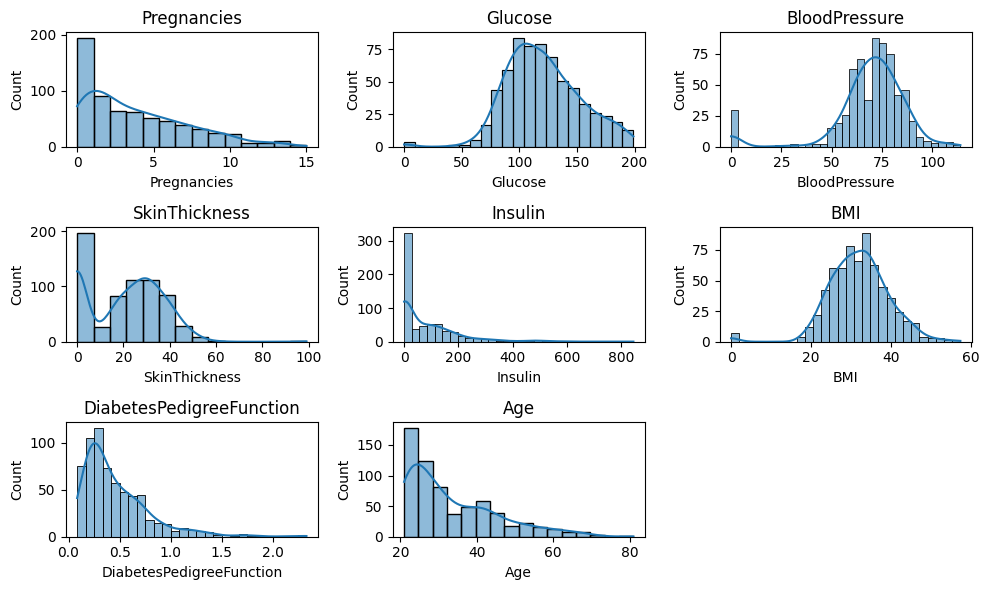

In [8]:
features = train.columns[1:-1 ]

plt.figure(figsize=(10,6))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(3,3,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.histplot(x=feature, data = train,kde=True)

plt.show()

### 4. feature들의 target class별 빈도수 시각화

아래 그래프를 보면, 각 구간에 대한 클래스 0과 클래스 1의 빈도수를 비교할 수 있다. 또한 가상의 수평선은 클래스 1의 비율에 따른 가상의 빈도 수를 나타낸다.

만약 특정 구간에서 클래스 1의 빈도수가 가상의 수평선 위에 있다면, 그 구간에서 클래스 1의 비율이 높다는 것을 의미하고, 아래에 있다면, 클래스 0의 비율이 높다는 것을 의미한다.

<Figure size 800x400 with 0 Axes>

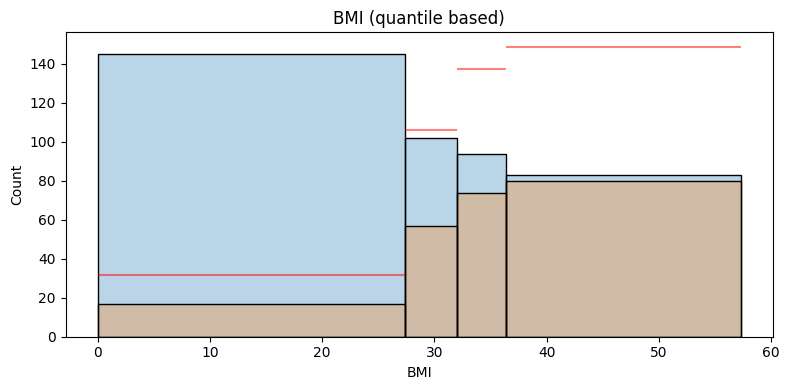

In [11]:
selected_feature = 'BMI'  # 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

plt.figure(figsize=(8,4))

# 사분위 수 계산
q1 = np.percentile(train[selected_feature], 25)
q2 = np.percentile(train[selected_feature], 50)
q3 = np.percentile(train[selected_feature], 75)
q4 = np.percentile(train[selected_feature], 100)

q_lst = [ 0, q1, q2, q3, q4]

# target class 1의 갯수 대비 target class 0의 갯수의 비율 구하기
num_class0 = len(train [ train['Outcome'] == 0 ])
num_class1 = len(train [ train['Outcome'] == 1 ])

ratio_class1_class0 = num_class0 / num_class1

# 히스토그램 그리기
plt.figure(figsize=(8, 4))
h0_ax1 = sns.histplot(data=train[train['Outcome'] == 0], x=selected_feature, bins = q_lst,  alpha=0.3,  label='Outcome = 0')
h1_ax1 = sns.histplot(data=train[train['Outcome'] == 1], x=selected_feature, bins = q_lst,  alpha=0.3,  label='Outcome = 1')

# target 변수의 class가 1일 때의 각 bin의 높이(개수)와 경계값을 얻어옵니다
h1_heights, h1_edges = np.histogram(train[train['Outcome'] == 1][selected_feature], bins=q_lst)

# target class 1의 갯수 대비 target class 0의 갯수의 비율과 일치하는 각 구간의 수평선을 그린다
for i in range(len(h1_heights)):
    plt.hlines(y=h1_heights[i] * ratio_class1_class0 , xmin=h1_edges[i], xmax=h1_edges[i+1], linestyles='solid', colors='red', alpha=0.5)

plt.gca().set_title(f"{selected_feature} (quantile based)")

plt.tight_layout()
plt.show()

### 5. feature들의 분포 및 이상치 탐색

아래 박스 플롯을 확인해보자.

Glucose 피처를 보면, Outcome이 1일 때의 중앙값이 0인 경우보다 더 높다는 것을 확인할 수 있다. 이는 당뇨병 환자들이 일반적으로고혈당을 가지고 있을 가능성이 높다는 것을 나타낸다.

반면, BloodPressure나 SkinThickness는 Outcome의 클래스에 따른 큰 차이를 보이지 않는다. 이는 이러한 피처들이 Outcome 예측에 큰 영향을 미치지 않을 수 있다는 것을 나타낼 수 있다.

특히, SkinThickness, Insulin, BMI, BloodPressure 피처를 보면, 박스 플롯의 하한선에서 벗어나 0으로 표시된 이상치가 눈에 띈다. 이는 0이라는 비정상적인 값을 가지는 데이터가 포함되어 있음을 나타내고, 이러한 값들은 결측치를 나타내거나 측정 오류로 인해 발생할 수 있다.

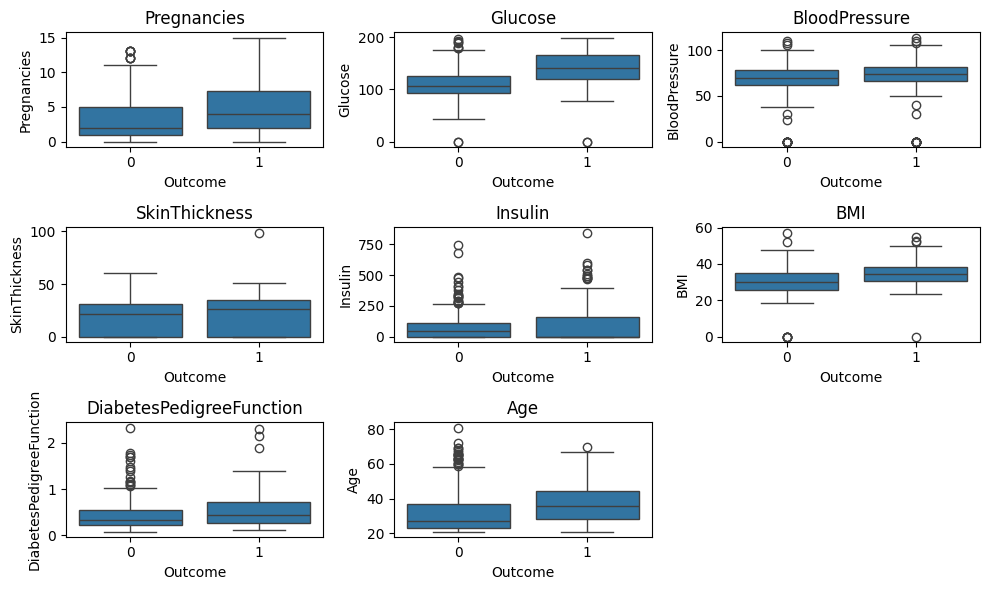

In [13]:
features = train.columns[1:-1 ]

plt.figure(figsize=(10,6))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(3,3,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.boxplot(x='Outcome', y=feature, data = train)

plt.show()

### 6. feature 변수쌍과 target과의 연관관계 시각화

Glucose 그래프를 살펴보면, 당뇨병 환자들이 일반적으로 비환자들보다 고혈당을 가지는 경향이 있음을 알 수 있다. -> Glucose 피처가 당뇨병 예측에 중요한 역할을 할 수 있음을 짐작

BMI 피처의 경우 환자와 비환자 모두 분포가 비슷한 모습을 보이지만, 당뇨병 환자들이 더 높은 BMI 값을가진 경우가 많음을 알 수 있다.

SkinThickness 피처의 경우, 많은 수의 0 값이 존재하므로, 이를 처리해줄 필요가 있을 수 있다.

Insulin 피처의 경우, 당뇨병 환자들이 일반적으로 더 높은 인슐린 수치를 가지는 경향이 있다. 이 피처 또한 많은 수의 0 값이 존재하므로, 처리해줄 필요가 있다.

BMI와 SkinThickness 사이에 어느 정도 양의 상관관계가 존재한다. 이는 체질량 지수가 높은 사람들이 피부 두께가 두꺼울 가능성이 높다는 것을 나타낸다.

<Figure size 300x200 with 0 Axes>

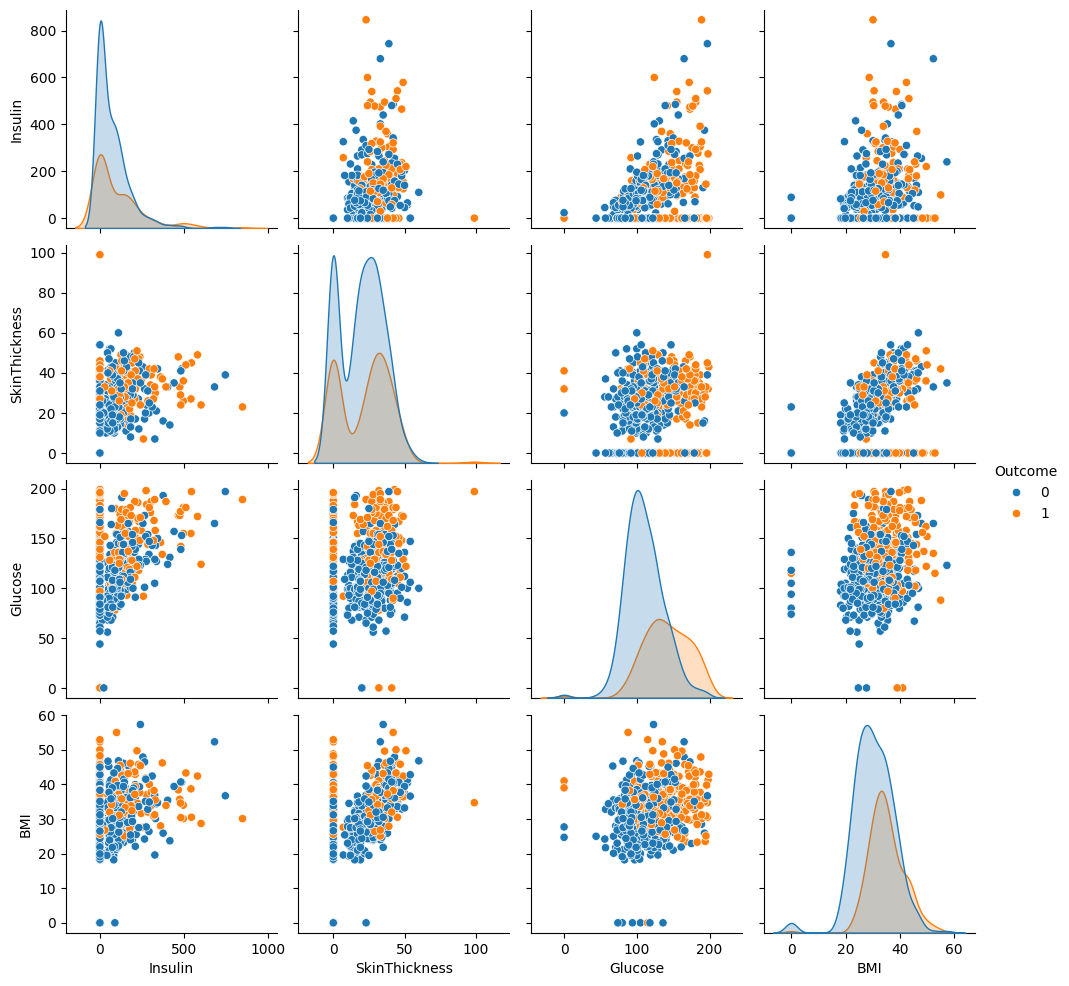

In [14]:
plt.figure(figsize=(3,2))

#features_to_analyze = train.columns[1:]
features_to_analyze = ['Insulin', 'SkinThickness', 'Glucose', 'BMI', 'Outcome']
sns.pairplot(train[features_to_analyze], hue='Outcome')

plt.show()

## 스테이지 3

### 1. 데이터 읽어오기

In [15]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

### 2. 수치형 feature와 이진 범주형 target간의 상관관계

pointbiserialr 함수를 이용하여 각 피처와 Outcome 특성 사이의 점 이연 상관관계와 p-value를 계산한다. 목표 변수와 높은 상관관계를 가진 특성들은 유용한 특성일 가능성이 높다.

* 점 이연 상관계수는 연속 변수와 이진 변수의 상관 관계를 측정하는 방법이다.

결과를 확인해보면 Glucose가 가장 높은 상관관계를 가지며, BMI, Age 등의 순으로 상관관계가 높다. SkinThickness와 BloodPressure는 상대적으로 낮은 상관관계를 보이고 있다.

In [16]:
from scipy.stats import pointbiserialr

correlation_org_lst, correlation_dealout_lst = [], []
p_value_org_lst, p_value_dealout_lst = [], []

feature_lst = train.columns[1:-1].to_list()

# 점 이연 상관계수 계산 및 출력
for feature in feature_lst:
    correlation_org, p_value_org = pointbiserialr(train[feature], train['Outcome'])
    correlation_org_lst.append(correlation_org)
    p_value_org_lst.append(p_value_org)


# 데이터프레임 생성
correlation_dict = {'Feature': feature_lst,
                    'correlation_org': correlation_org_lst,
                    'p_value_org' : p_value_org_lst }

correlation_df = pd.DataFrame(correlation_dict)

display(correlation_df)

,Feature,correlation_org,p_value_org
0,Pregnancies,0.211340,5.102077e-08
1,Glucose,0.460108,1.798069e-35
2,BloodPressure,0.049459,2.072204e-01
3,SkinThickness,0.052094,1.840018e-01
4,Insulin,0.123246,1.616097e-03
5,BMI,0.294390,1.676326e-14
6,DiabetesPedigreeFunction,0.173584,8.283545e-06
7,Age,0.218183,1.818929e-08


### 3. 수치형 feature와 이진 범주형 target간의 상관관계 (2)

C:\Users\CHOYS\AppData\Local\Temp\ipykernel_3404\892043096.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(feature_lst, rotation=30)
C:\Users\CHOYS\AppData\Local\Temp\ipykernel_3404\892043096.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(feature_lst, rotation=30)


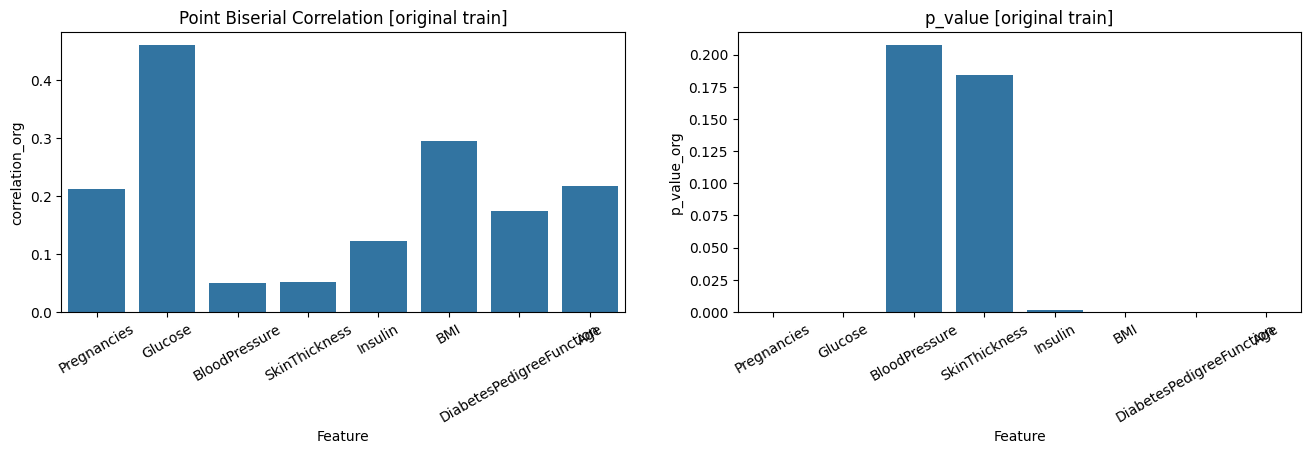

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn barplot

plt.figure(figsize=(16, 8))

plt.subplot(2,2,1)
sns.barplot(x='Feature', y='correlation_org', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [original train]")
plt.gca().set_xticklabels(feature_lst, rotation=30)

plt.subplot(2,2,2)
sns.barplot(x='Feature', y='p_value_org', data=correlation_df)
plt.gca().set_xticklabels(feature_lst, rotation=30)
plt.gca().set_title("p_value [original train]")

plt.show()

### 4. feature간 상관 관계

'Age'와 'Pregnancies' 특성 사이에 어느 정도의 양의 상관관계가 있다. 즉, 임신 횟수가 많을 수록 나이가 많을 가능성이 높다는 것을 의미한다.

또한 'Insulin'과 'SkinThickness' 사이에도 어느 정도의 양의 상관관계가 있다. 이는 인슐린 수치가 높을수록 피부 두께가 두꺼워질 가능성이 있음을 나타낸다.
'BMI'와 'SkinThickness' 또한 마찬가지다.

하지만 이러한 상관관계가 반드시 인과관계를 의미하지는 않는다. 또한, 이러한 상관관계가 높은 특성들은 다중 공선성 문제를 일으킬 수 있으므로, 모델링 시 주의가 필요하다.

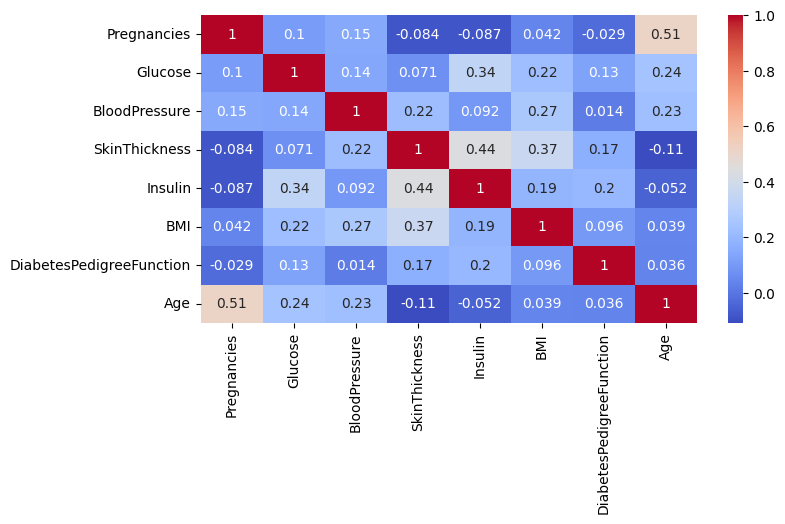

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

features = train.columns[1:-1]
# 이번 셀에서 출력할 이미지 크기를 지정합니다.
plt.figure(figsize = (8,4))

# annot을 False로 설정하면 각 셀의 수치가 표기되지 않습니다.
sns.heatmap(train[features].corr(), cmap = "coolwarm", annot = True)
plt.show()

### 5. 다중 공선성과 VIF를 이해하고 측정하기

결과를 보면, Glucose와 BMI가 높은 VIF 값을 가지고 있다. 이는 두 피처가 다른 피처들과 높은 상관관계를 가지고 있음을 의미한다.
이러한 상황을 해결하기 위해 다음과 같으 방법이 있다.

1. 피처 선택: VIF 값이 높은 피처를 제거한다
2. 차원 축소: 주성분 분석 등의 차원 축소 방법을 사용
3. 피처 조합: 상관 관계가 높은 피처들을 조합하여 새로운 피처를 생성한다
4. 규제화를 사용하는 모델 사용: 릿지 또는 라쏘 같은 모델 사용

,features,VIF
0,Pregnancies,3.258236
1,Glucose,16.758235
2,BloodPressure,14.606656
3,SkinThickness,3.905130
4,Insulin,2.064910
5,BMI,18.905627
6,DiabetesPedigreeFunction,3.119245
7,Age,12.800928


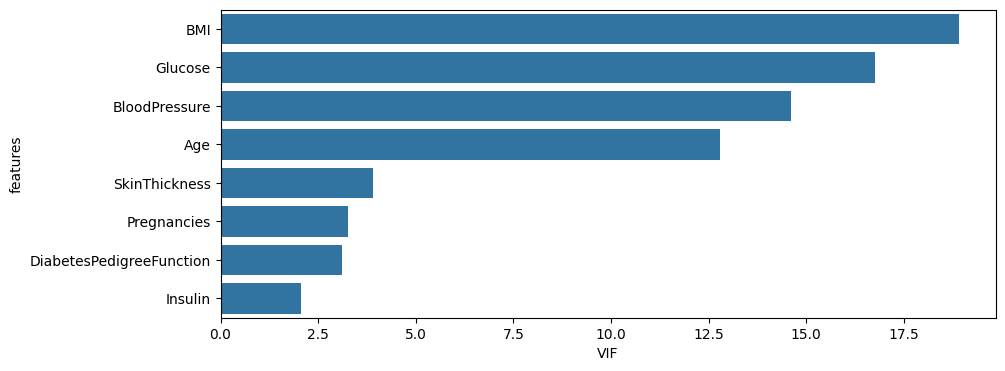

In [19]:
# Import required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_org = train.columns[1:-1]
train_x = train[features_org]

vif = pd.DataFrame()
vif["features"] = train_x.columns

# 빈 리스트를 생성합니다.
VIF_list = []

# 각 피처에 대해 반복합니다.
for i in range(len(train_x.columns)):

    # variance_inflation_factor 함수를 사용하여 해당 피처의 VIF 값을 계산합니다.
    VIF_value = variance_inflation_factor(train_x.values, i)

    # 계산된 VIF 값을 리스트에 추가합니다.
    VIF_list.append(VIF_value)

# VIF 값 리스트를 DataFrame에 추가합니다.
vif["VIF"] = VIF_list

display(vif)

# Set the figure size
plt.figure(figsize=(10, 4))

# Create a bar plot of VIF values
sns.barplot(x="VIF", y="features", data=vif.sort_values("VIF", ascending=False))

# Show the plot
plt.show() 

### 6. RandomForest에 의한 feature 중요도 확인

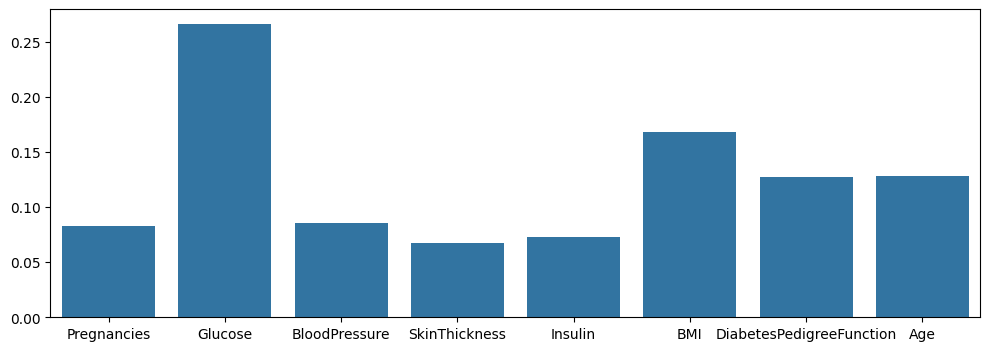

In [20]:
from sklearn.ensemble import RandomForestClassifier

features = train.columns[1:-1]
train_x = train[features]
train_y = train['Outcome']

RF_model = RandomForestClassifier(random_state = 42)
RF_model.fit(train_x,train_y)
importances = RF_model.feature_importances_
feature_names = RF_model.feature_names_in_

plt.figure(figsize=(12,4))
sns.barplot(x=feature_names, y= importances)
plt.show()

### 7. Logistic Regression에 의한 feature 중요도 확인

[0.4107746155970603,
 1.1007000606037072,
 0.23210348422498053,
 0.07143126197382965,
 0.11939374753679408,
 0.7054031180997122,
 0.34162020663205217,
 0.14583581454852176]

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

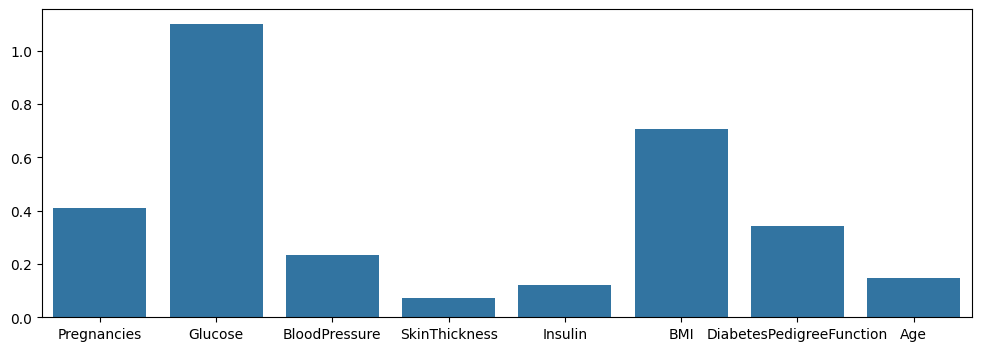

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

features = list(train.columns[1:-1])
train_x = train[features]
train_y = train['Outcome']

scaler = StandardScaler()
train_scaled_x = train_x.copy()
train_scaled_x[features] = scaler.fit_transform(train_x)

LR_model = LogisticRegression(random_state = 42, max_iter=2000)
LR_model.fit(train_scaled_x,train_y)
importances = list(np.abs(LR_model.coef_[0]))
feature_names = features

display(importances)
display(feature_names)
plt.figure(figsize=(12,4))
sns.barplot(x=feature_names, y= importances)

plt.show()

## 스테이지 4

### 1. 데이터 읽어오기

In [20]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

### 2. 기본 교차 검증 성능


Stratified K-Fold 교차 검증은 각 폴드에서의 클래스 분포가 전체 데이터셋의 클래스와 유사하도록 데이터를 분할한다.

Target 변수 class별 비율에서 0과 1의 비율이 약 65%-35% 수준이기에, 클래스 불균형이 있다고 판단되므로 Stratified K-Fold 교차 검증을 사용하는 것이 좋다.

이 결과를 통해 RandomForestClassifier 모델의 교차 검증 성능을 파악할 수 있다.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

features_org = train.columns[1:-1]

train_x = train[features_org]
train_y = train['Outcome']

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

display("#######  기본 교차 검증 성능  #########")

RF_model = RandomForestClassifier(random_state = 42)
cv_result = cross_validate(RF_model, train_x, train_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result = pd.DataFrame(cv_result, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result)
display(df_cv_result.describe().loc['mean',:].to_frame().T)

'#######  기본 교차 검증 성능  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.736196,0.652174,0.526316,0.582524
1,0.736196,0.640000,0.561404,0.598131
2,0.730061,0.666667,0.456140,0.541667
3,0.742331,0.631579,0.631579,0.631579


,test_accuracy,test_precision,test_recall,test_f1
mean,0.736196,0.647605,0.54386,0.588475


### 3. IQR 기반 이상치 (Outlier) 검출


아래 결과를 보면, 각 특성별로 탐지된 이상치의 개수 및 인덱스를 확인할 수 있다.

In [22]:
# 이상치를 탐지하는 함수 정의
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    # IQR 기반으로 이상치 범위를 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치의 인덱스를 반환
    return dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)].index

# 숫자형 데이터만 대상으로 이상치 탐지
numeric_columns = train.select_dtypes(include=[np.number]).columns.tolist()

outliers_dict = {}
for column in features_org:
    outliers = detect_outliers(train, column)
    if len(outliers) > 0:
        outliers_dict[column] = outliers
    display(f"num of outlier of {column} : {len(outliers)}")

display(outliers_dict)


'num of outlier of Pregnancies : 3'

'num of outlier of Glucose : 4'

'num of outlier of BloodPressure : 41'

'num of outlier of SkinThickness : 1'

'num of outlier of Insulin : 32'

'num of outlier of BMI : 13'

'num of outlier of DiabetesPedigreeFunction : 30'

'num of outlier of Age : 8'

{'Pregnancies': Index([85, 367, 531], dtype='int64'),
 'Glucose': Index([61, 399, 497, 601], dtype='int64'),
 'BloodPressure': Index([ 15,  26,  51, 102, 122, 124, 135, 151, 161, 191, 235, 239, 241, 248,
        255, 275, 287, 291, 304, 312, 317, 333, 355, 361, 362, 363, 369, 374,
        386, 391, 398, 405, 430, 452, 456, 508, 543, 560, 616, 629, 636],
       dtype='int64'),
 'SkinThickness': Index([213], dtype='int64'),
 'Insulin': Index([ 11,  50,  70,  98, 117, 129, 140, 193, 212, 247, 257, 258, 261, 302,
        326, 341, 342, 360, 381, 417, 444, 484, 512, 525, 576, 587, 600, 618,
        620, 625, 635, 638],
       dtype='int64'),
 'BMI': Index([26, 135, 151, 275, 312, 359, 361, 430, 474, 533, 579, 592, 625], dtype='int64'),
 'DiabetesPedigreeFunction': Index([ 50,  79,  92,  96, 113, 114, 130, 163, 250, 327, 336, 338, 382, 402,
        407, 426, 427, 439, 481, 491, 498, 548, 554, 566, 573, 592, 597, 618,
        623, 633],
       dtype='int64'),
 'Age': Index([10, 14, 255, 256, 

### 4. IQR 기반의 이상치 (Outlier) 중위값 대체 및 교차 검증 변화 확인

이상치를 중앙값으로 대체한 후 모델의 교차 검증 성능을 다시 확인해본 결과, 약 74.08%로 측정되었다. 이전에 얻은 성능보다 약간 높은 것을 확인할 수 있지만, 이는 IQR 기반의 이상치 처리 방법이 이 데이터셋에서 모델의 성능을 크게 향상시키지 못했다는 것을 의미한다.

In [23]:
train_dout_median = train.copy()

#이상치를 중앙값으로 대체
for column, outlier_indices in outliers_dict.items():
    median_value = train_dout_median[column].median()
    train_dout_median.loc[outlier_indices, column] = median_value

train_dout_median_x = train_dout_median[features_org]
train_dout_median_y = train_dout_median['Outcome']

RF_model = RandomForestClassifier(random_state = 42)

# 이상치 처리 후 RandomForest를 사용한 교차 검증 성능 확인
cv_result_dout_median = cross_validate(RF_model, train_dout_median_x, train_dout_median_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_dout_median = pd.DataFrame(cv_result_dout_median, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_dout_median)
display(df_cv_result_dout_median.describe().loc['mean',:].to_frame().T)

C:\Users\CHOYS\AppData\Local\Temp\ipykernel_9276\3169161144.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_dout_median.loc[outlier_indices, column] = median_value


,test_accuracy,test_precision,test_recall,test_f1
0,0.760736,0.687500,0.578947,0.628571
1,0.742331,0.636364,0.614035,0.625000
2,0.699387,0.595238,0.438596,0.505051
3,0.760736,0.687500,0.578947,0.628571


,test_accuracy,test_precision,test_recall,test_f1
mean,0.740798,0.65165,0.552632,0.596798


### 5. IQR 기반의 이상치 (Outlier) 제거 및 교차 검증 성능 변화 확인


이상치를 제거 후 모델의 고차 검증 성능을 확인한 결과 약 76.74%로 측정되었다. 이는 중앙값으로 대체했을 때보다 더 향상된 수치이다.

In [24]:
train_delete_outlier = train.copy()

# 원본 train 데이터에서 이상치 제거
rows_to_drop = set()
for column in features_org:
    outliers_indices = detect_outliers(train_delete_outlier, column)
    rows_to_drop.update(outliers_indices)

train_delete_outlier = train_delete_outlier.drop(rows_to_drop, axis=0)

train_delete_outlier_x = train_delete_outlier[features_org]
train_delete_outlier_y = train_delete_outlier['Outcome']

# 이상치를 제거한 후 RandomForest를 사용한 교차 검증 성능 확인
cv_result_delete_outlier = cross_validate(RF_model, train_delete_outlier_x, train_delete_outlier_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_delete_outlier = pd.DataFrame(cv_result_delete_outlier, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(f"IQR 기반의 이상치 제거한 갯수 : {len(train) - len(train_delete_outlier)} 개,  비율 : {(len(train) - len(train_delete_outlier))/len(train) * 100.0}")

display(df_cv_result_delete_outlier)
display(df_cv_result_delete_outlier.describe().loc['mean',:].to_frame().T)

'IQR 기반의 이상치 제거한 갯수 : 119 개,  비율 : 18.25153374233129'

,test_accuracy,test_precision,test_recall,test_f1
0,0.753731,0.642857,0.439024,0.521739
1,0.744361,0.615385,0.400000,0.484848
2,0.781955,0.677419,0.525000,0.591549
3,0.789474,0.724138,0.512195,0.600000


,test_accuracy,test_precision,test_recall,test_f1
mean,0.76738,0.66495,0.469055,0.549534


### 6. z_score 기반의 이상치 제거 및 교차 검증 성능 변화 확인


z_score를 이용하여 모델의 교차 검증 성능은 약 76.85%로 IQR 기반의 이상치 제거 방법보다 정확도가 높아졌음을 의미한다.

제거된 데이터의 수도 69개로 크게 줄어들었다.

In [25]:
from scipy import stats

# Z-score 기반 이상치 제거
z_scores = np.abs(stats.zscore(train_x))

threshold = 3  # 이 값을 조절하여 이상치로 간주되는 임계점을 설정합니다.
train_zscore = train.copy()[(z_scores < threshold).all(axis=1)]

display(f"z_score 기반의 이상치 제거한 갯수 : {len(train) - len(train_zscore)} 개, 비율 : {(len(train) - len(train_zscore))/len(train) * 100.0}")

# 데이터 업데이트
train_zscore_x = train_zscore[features_org]
train_zscore_y = train_zscore['Outcome']

display("####### Z-score 기반 이상치 제거 후 교차 검증 성능 #########")

RF_model = RandomForestClassifier(random_state=42)
cv_result_zscore = cross_validate(RF_model, train_zscore_x, train_zscore_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_zscore = pd.DataFrame(cv_result_zscore, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])


display(df_cv_result_zscore)
display(df_cv_result_zscore.describe().loc['mean',:].to_frame().T)

'z_score 기반의 이상치 제거한 갯수 : 69 개, 비율 : 10.582822085889571'

'####### Z-score 기반 이상치 제거 후 교차 검증 성능 #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.767123,0.684211,0.541667,0.604651
1,0.739726,0.656250,0.437500,0.525000
2,0.739726,0.647059,0.458333,0.536585
3,0.827586,0.789474,0.638298,0.705882


,test_accuracy,test_precision,test_recall,test_f1
mean,0.76854,0.694248,0.518949,0.59303


### 7. SMOTE 통한 데이터 불균형


SMOTE를 이용하여 오버샘플링 후 교차 검증 과정을 진행한 결과, 78.39%의 정확도가 나왔다.

In [26]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE,KMeansSMOTE,SVMSMOTE
from sklearn.metrics import accuracy_score

rf_model_resampled_ = RandomForestClassifier(random_state = 42)

# 교차 검증을 수동으로 구현하기 위한 리스트 초기화
accuracies = []

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
smote_kmeans = KMeansSMOTE(random_state=42)

for train_idx, val_idx in kf.split(train_zscore_x, train_zscore_y):

    # 학습 데이터와 검증 데이터 분할
    X_train, X_val = train_zscore_x.iloc[train_idx], train_zscore_x.iloc[val_idx]
    y_train, y_val = train_zscore_y.iloc[train_idx], train_zscore_y.iloc[val_idx]

    # 학습 데이터에만 SMOTE 오버샘플링 적용
    X_train_resampled, y_train_resampled = smote_kmeans.fit_resample(X_train, y_train)

    # 오버샘플링된 학습 데이터로 모델 학습
    rf_model_resampled_.fit(X_train_resampled, y_train_resampled)

    # 검증 데이터에 대한 예측
    val_predictions = rf_model_resampled_.predict(X_val)

    # 성능 지표 계산
    accuracies.append(accuracy_score(y_val, val_predictions))


# 성능 지표의 평균 계산
mean_accuracy = np.mean(accuracies)


display(f"accuracy of each Fold : {accuracies}")
display(f"accuracy of mean_accuracy : {mean_accuracy}")

'accuracy of each Fold : [0.821917808219178, 0.7534246575342466, 0.7602739726027398, 0.8]'

'accuracy of mean_accuracy : 0.7839041095890411'

### 8. feature pair의 조합 연산 통한 새로운 feature 생성


Insulin, Age 조합에서는 Insulin_Age_Sum 이라는 피처를 추가했을 때 정확도가 약 78.4%로 성능 향상이 있었고

Insulin, BMI 조합에서는 Insulin_BMI_Ratio 라는 피처를 추가했을 때 정확도가 약 78.2%로 성능 향상이 있었고

Age, BMI 조합에서는 Age_BMI_Ratio 라는 피처를 추가했을 때 정확도가 약 76.7%로 성능 저하가 있었다.

In [27]:
import itertools

# 기존 피처의 조합을 생성하고, 새로운 피처를 추가한 후 각 조합에 대한 교차 검증 점수를 계산합니다.
# 그 중에서 가장 높은 정확도를 가진 피처만 선택합니다.

# RandomForest 모델과 KFold 객체를 생성합니다.
rf_model = RandomForestClassifier(random_state = 42)

# 주어진 피처의 조합을 생성합니다.
features_subset = ['Insulin', 'Age', 'BMI']
feature_combinations = list(itertools.combinations(features_subset, 2))

cv_scores = {}
for feature_pair in feature_combinations:
    feature1, feature2 = feature_pair

    train_try = train_zscore_x.copy()

    # 새로운 피처를 추가합니다.
    train_try[f'{feature1}_{feature2}_Diff'] = train_try[feature1] - train_try[feature2]
    train_try[f'{feature1}_{feature2}_Sum'] = train_try[feature1] + train_try[feature2]
    train_try[f'{feature1}_{feature2}_Ratio'] = train_try[feature1] / (train_try[feature2].replace(0, train_try[feature2].median()))

    features_to_evaluate = [f'{feature1}_{feature2}_Diff', f'{feature1}_{feature2}_Sum', f'{feature1}_{feature2}_Ratio']

    # 각 피처에 대한 교차 검증 점수를 계산합니다.
    feature_scores = {}
    for feature in features_to_evaluate:
        scores = cross_val_score(rf_model, pd.concat([train_zscore_x, train_try[feature]], axis=1), train_zscore_y, cv=kf, scoring='accuracy')
        feature_scores[feature] = scores.mean()

    # 가장 높은 점수를 가진 피처만 선택합니다.
    best_feature = max(feature_scores, key=feature_scores.get)
    cv_scores[best_feature] = feature_scores[best_feature]
    display(f"cv_scores[{best_feature}] : {cv_scores[best_feature]}")

# 점수를 기준으로 정렬합니다.

# 먼저, cv_scores 딕셔너리의 각 항목을 리스트로 변환합니다.
items = list(cv_scores.items())

# 그 다음, 이 리스트를 정렬합니다. 각 항목은 (key, value) 쌍이므로, item[1]을 사용하여 값을 기준으로 정렬합니다.
sorted_items = sorted(items, key=lambda item: item[1], reverse=True)

# 이제 이 정렬된 리스트를 다시 딕셔너리로 변환합니다.
cv_scores = dict(sorted_items)

display(cv_scores)

'cv_scores[Insulin_Age_Sum] : 0.7839631554085971'

'cv_scores[Insulin_BMI_Ratio] : 0.7822626358053849'

'cv_scores[Age_BMI_Ratio] : 0.7668162494095419'

{'Insulin_Age_Sum': 0.7839631554085971,
 'Insulin_BMI_Ratio': 0.7822626358053849,
 'Age_BMI_Ratio': 0.7668162494095419}

### 9. feature pair의 조합 연산 통한 feature 추가하여 교차 검증 성능 확인


In [28]:
from sklearn.ensemble import RandomForestClassifier

# 피쳐 생성
train_try = train_zscore.copy()

train_try['Insulin_Age_Sum'] = train_try['Insulin'] + train_try['Age']
train_try['BMI'] = train_try['BMI'].replace(0, train_try['BMI'].median())
train_try['Insulin_BMI_Ratio'] = train_try['Insulin'] / train_try['BMI']

# 피쳐 추가
train_prep = train_zscore.copy()
train_prep['Insulin_Age_Sum'] = train_try['Insulin_Age_Sum']
train_prep['Insulin_BMI_Ratio'] = train_try['Insulin_BMI_Ratio']

train_prep_y= train_prep['Outcome']
train_prep_x = train_prep.drop(['ID', 'Outcome'], axis=1)

RF_model_prep = RandomForestClassifier(random_state=42)
cv_result_prep = cross_validate(RF_model_prep, train_prep_x, train_zscore_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_prep = pd.DataFrame(cv_result_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_prep)
display(df_cv_result_prep.describe().loc['mean',:].to_frame().T)

display(train_prep_x.head(5))

,test_accuracy,test_precision,test_recall,test_f1
0,0.773973,0.702703,0.541667,0.611765
1,0.773973,0.741935,0.479167,0.582278
2,0.739726,0.625000,0.520833,0.568182
3,0.841379,0.800000,0.680851,0.735632


,test_accuracy,test_precision,test_recall,test_f1
mean,0.782263,0.71741,0.555629,0.624464


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_Age_Sum,Insulin_BMI_Ratio
0,4,103,60,33,192,24.0,0.966,33,225,8.000000
1,10,133,68,0,0,27.0,0.245,36,36,0.000000
2,4,112,78,40,0,39.4,0.236,38,38,0.000000
3,1,119,88,41,170,45.3,0.507,26,196,3.752759
4,1,114,66,36,200,38.1,0.289,21,221,5.249344


### 10. test 데이터에 동일한 피쳐 생성, 추가 하기


In [30]:
test['Insulin_Age_Sum'] = test['Insulin'] + test['Age']
test['BMI'] = test['BMI'].replace(0, test['BMI'].median())
test['Insulin_BMI_Ratio'] = test['Insulin'] / test['BMI']

test.head(5)

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Insulin_Age_Sum,Insulin_BMI_Ratio
0,TEST_000,5,112,66,0,0,37.8,0.261,41,41,0.000000
1,TEST_001,3,107,62,13,48,22.9,0.678,23,71,2.096070
2,TEST_002,3,113,44,13,0,22.4,0.140,22,22,0.000000
3,TEST_003,6,190,92,0,0,35.5,0.278,66,66,0.000000
4,TEST_004,1,107,72,30,82,30.8,0.821,24,106,2.662338


### 11. 모델 학습, 추론하여 제출 화일 생성하기


In [31]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(train_prep_x, train_prep_y)

test_x = test.drop('ID', axis=1)

pred = rf_model.predict(test_x)
submission['Outcome'] = pred

submission.to_csv("data/diabete/submission.csv", index = False)

## 스테이지 5

### 1. 데이터 읽어오기


In [32]:
import pandas as pd

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

### 2. feature 값이 0인 데이터 관찰과 해석


분포를 보면 0 부근에 분포가 튀어 있음을 관찰할 수 있고, 물리적으로 0이라는 값이 존재할 수 없는 수치임을 알 수 있다.

즉, 데이터가 없는 결측치인데 0으로 처리된 경우이다.

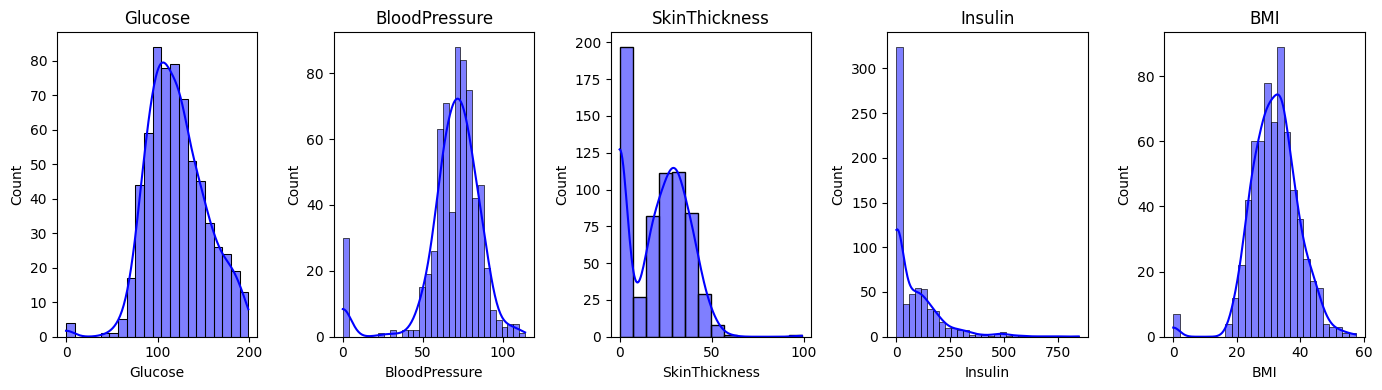

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI' ]

plt.figure(figsize=(14,4))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(1,5,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.histplot(x=feature, data = train, color = 'blue', kde=True)

plt.show()

### 3. train data 결측치 빈도수 및 비율 확인


SkinThickness와 Insulin의 피처가 많은 결측치가 있다. 결측치가 많아도 이를 제거하면 데이터의 많은 부분이 손실될 수 있기에 적절한 방법을 사용해야 한다.

In [34]:
features_to_check = ['SkinThickness', 'Insulin', 'Glucose', 'BMI', 'BloodPressure']

for feature in features_to_check:
    n_missing = len(train[train[feature] == 0])
    ratio_missing = round(n_missing / len(train) * 100.0, 1)
    print(f"{feature} 결측치 갯수 : {n_missing}/{len(train)} ({ratio_missing})%")

SkinThickness 결측치 갯수 : 195/652 (29.9)%
Insulin 결측치 갯수 : 318/652 (48.8)%
Glucose 결측치 갯수 : 4/652 (0.6)%
BMI 결측치 갯수 : 7/652 (1.1)%
BloodPressure 결측치 갯수 : 30/652 (4.6)%


### 4. train, test data의 결측치 분포 비교


모든피쳐들에서 훈련 데이터와 테스트 데이터의 결측치 비율이 대체로 비슷한 것을 확인할 수 있다.

이는 결측치 처리 방법을 선택할 때 동일하게 적용할 수 있음을 나타낸다.

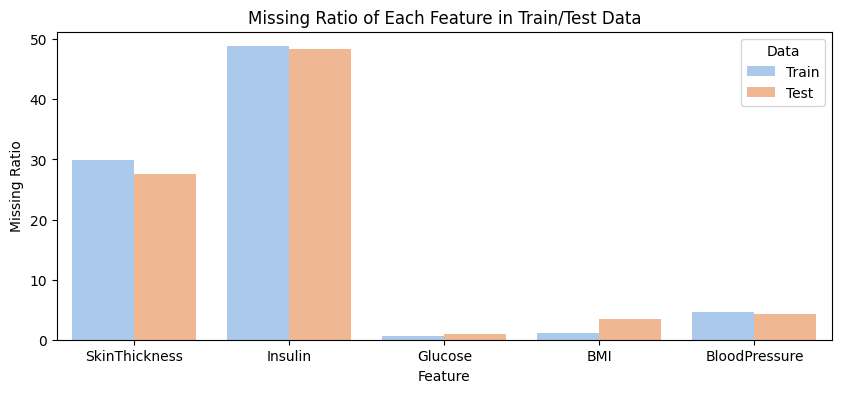

In [35]:
# seaborn의 색상 팔레트를 변경합니다.
sns.set_palette('pastel')

# Train 데이터의 결측치 비율을 계산합니다.
missing_ratio_train = []
for feature in features_to_check:
    n_missing = len(train[train[feature] == 0])
    ratio_missing = round(n_missing / len(train) * 100.0, 1)
    missing_ratio_train.append(ratio_missing)

# Test 데이터의 결측치 비율을 계산합니다.
missing_ratio_test = []
for feature in features_to_check:
    n_missing = len(test[test[feature] == 0])
    ratio_missing = round(n_missing / len(test) * 100.0, 1)
    missing_ratio_test.append(ratio_missing)

# 각각의 데이터프레임으로 변환합니다.
missing_df_train = pd.DataFrame({'Feature': features_to_check, 'Missing Ratio': missing_ratio_train, 'Data': 'Train'})
missing_df_test = pd.DataFrame({'Feature': features_to_check, 'Missing Ratio': missing_ratio_test, 'Data': 'Test'})

# 두 데이터프레임을 합쳐서 새로운 데이터프레임을 만듭니다.
missing_df = pd.concat([missing_df_train, missing_df_test])

# 시각화를 합니다.
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='Missing Ratio', hue='Data', data=missing_df)
plt.title('Missing Ratio of Each Feature in Train/Test Data')
plt.show()

### 5. Insulin 결측치 그룹과 정상 그룹 간 다른 피처들의 결측치 비율 비교


시각화 결과, Insulin 결측치 그룹과 아닌 그룹 간에 피처드르이 결측치 비율에서 상당한 차이가 있음을 보여준다.

특히, Insulin 결측치인 그룹에서 SkinThickness와 BloodPressure 비율은 훨씬 높은 것으로 보인다.

반면 Insulin 결측치가 없는 그룹에서 이러한 피처들의 결측치 비율이 상대적으로 낮다. 이는 두 그룹이 서로 다른 특성을 가지고 있음을 의미한다.

결과적으로, 이 두 그룹은 매우 다른 특성을 가지고 있고, 이 점을 고려하지 않고 결측치를 대체하면 정보 손실이나 왜곡이 발생할 수 있다.

,Feature,Missing Insulin,Normal Insulin
0,SkinThickness,61.320755,0.000000
1,Glucose,0.943396,0.299401
2,BMI,1.886792,0.299401
3,BloodPressure,9.433962,0.000000


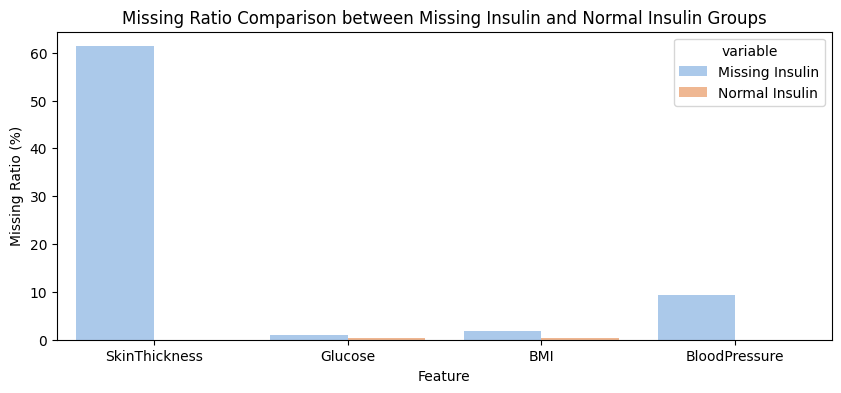

In [36]:
# 'Insulin'이 결측치인 데이터와 결측치가 아닌 데이터를 분리
train_missing_insulin = train[train['Insulin'] == 0]
train_normal_insulin = train[train['Insulin'] != 0]

# 'Insulin'을 제외한 피처 리스트
features_to_check = ['SkinThickness', 'Glucose', 'BMI', 'BloodPressure']


# 각 데이터 프레임에 대한 결측치 비율 계산
missing_insulin_ratios = [len(train_missing_insulin[train_missing_insulin[feature] == 0]) / len(train_missing_insulin) * 100.0 for feature in features_to_check]
normal_insulin_ratios = [len(train_normal_insulin[train_normal_insulin[feature] == 0]) / len(train_normal_insulin) * 100.0 for feature in features_to_check]

# 데이터 프레임 생성
df_missing_ratios = pd.DataFrame({
    'Feature': features_to_check,
    'Missing Insulin': missing_insulin_ratios,
    'Normal Insulin': normal_insulin_ratios
})

display(df_missing_ratios)

# 데이터 프레임을 긴 형식(long format)으로 변경
df_missing_ratios_melted = df_missing_ratios.melt(id_vars='Feature', value_vars=['Missing Insulin', 'Normal Insulin'])

# 시각화
plt.figure(figsize=(10, 4))
sns.barplot(x='Feature', y='value', hue='variable', data=df_missing_ratios_melted)
plt.ylabel('Missing Ratio (%)')
plt.title('Missing Ratio Comparison between Missing Insulin and Normal Insulin Groups')
plt.show()

### 6. Insulin 결측치 데이터셋과 정상 데이터셋의 각 feature의 분포 비교


전반적으로 Pregnancies, Age, SkinThickness에서 분포의 차이가 있어보이고, Glucose, BloodPressure, BMI는 유사한 분포를 가진다.

C:\Users\CHOYS\AppData\Local\Temp\ipykernel_9276\1310620491.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df2[feature], bw_adjust=0.5, label=label2)


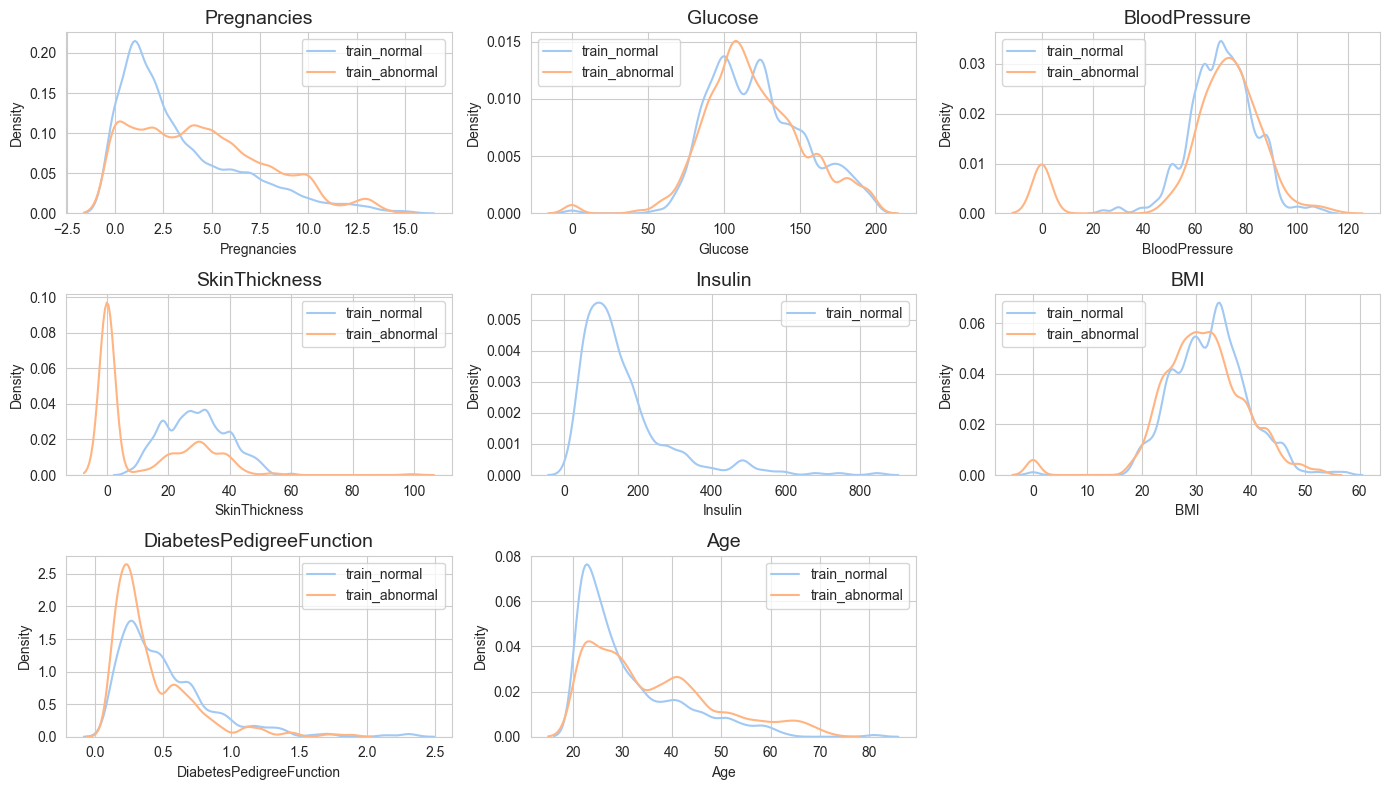

In [37]:
features_org = train.columns[1:-1]

# 특성들의 분포를 시각화하기 위한 함수
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure(figsize=(14,8))
    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.kdeplot(df1[feature], bw_adjust=0.5, label=label1)
        sns.kdeplot(df2[feature], bw_adjust=0.5, label=label2)
        plt.title(feature, fontsize=14)
        plt.legend()
    plt.tight_layout()
    plt.show()

# train_normal과 train_abnormal 데이터셋의 특성 분포 시각화
plot_feature_distribution(train_normal_insulin, train_missing_insulin, "train_normal", "train_abnormal", features_org)

### 7. Insulin 결측치 데이터셋과 정상 데이터셋 간의 통계적 차이 검정, T-검정 고려 (1)


Shapiro-Wilk 정규성 검정은 검정 통계량과 p-value를 반환한다. p-value가 0.05보다 크면 해당 데이터가 정규 분포를 따른다는 귀무가설을 기각하지 않는다.

결과를 해석해보면, 정상적인 Insulin 값을 가진 데이터셋과 결측치를 가진 Insulin 데이터셋의 모든 특성들이 정규 분포르 따르지 않음을 확인할 수 있다. 따라서 T-검정은 할 수 없고, 비 모수적 검정 방법을 사용해야 한다.

In [38]:
from scipy.stats import shapiro

# Function to test normality using Shapiro-Wilk test
def test_normality(data):
    p_value = shapiro(data)[1]
    return p_value > 0.05

features = train.columns[1:-1]

# Testing normality for each feature in both datasets
normality_results_normal = {feature: test_normality(train_normal_insulin[feature]) for feature in features}
normality_results_missing = {feature: test_normality(train_missing_insulin[feature]) for feature in features}

display(normality_results_normal)
display(normality_results_missing)

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


{'Pregnancies': False,
 'Glucose': False,
 'BloodPressure': False,
 'SkinThickness': False,
 'Insulin': False,
 'BMI': False,
 'DiabetesPedigreeFunction': False,
 'Age': False}

{'Pregnancies': False,
 'Glucose': False,
 'BloodPressure': False,
 'SkinThickness': False,
 'Insulin': True,
 'BMI': False,
 'DiabetesPedigreeFunction': False,
 'Age': False}

### 8. Mann-Whitney U 테스트 통한 두 데이터셋 간의 유의미한 차이 검정


Mann-Whitney U 검정은 두 독립적인 그룹 간의 중앙값 차이를 비교하는 비모수적 방법이다. 이 검정은 데이터가 정규분포를 따르지 않거나 표본 크기가 작을 때 유용하다. 
몇 가지 주의사항이 있는데, 두 그룹의 표본 크기가 매우 다르면 결과가 왜곡될 수 있다.

결과를 보면, Pregnancies, Insulin, SkinThickness, BMI, DiabetesPedigreeFunction, Age에서 결측치인 데이터와 아닌 데이터 간에 통계적으로 유의미한 차이가 있음을 알 수 있다.

In [39]:
##############################################################################
# Mann-Whitney U 테스트 통한 두 집단간 차이가 있는지를 통계적으로 검정
#############################################################################
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Dictionary to store p-values for the Mann-Whitney U test
mwu_pvalues = {}

column_lst = train.columns[1:]
# Apply Mann-Whitney U test for each feature
for column in column_lst:
    if column != 'ID':  # Exclude the 'ID' column
        _, p_value = mannwhitneyu(train_missing_insulin[column], train_normal_insulin[column])
        mwu_pvalues[column] = p_value

display(mwu_pvalues)

{'Pregnancies': 3.9128231274464e-06,
 'Glucose': 0.4918211064207565,
 'BloodPressure': 0.3571499089544796,
 'SkinThickness': 3.8449530612401654e-41,
 'Insulin': 4.620801078882003e-122,
 'BMI': 0.021561267194010858,
 'DiabetesPedigreeFunction': 3.6452537161343067e-06,
 'Age': 4.752779400653781e-08,
 'Outcome': 0.10778310764824817}

### 9. 향후 데이터 분석 및 모델링 전략 설정 : Insulin 결측치 데이터와 정상 데이터 교차검증


결과를 해석하면, Insulin 결측치가 없는 데이터셋은 약 79%, 결측치가 있는 데이터셋은 약 72%의 정확도가 나타났다.

이는 두 그룹의 데이터가 각기 다른 특성을 가지고 있음을 나타내고, 서로 다른 모델로 학습시키는것이 더 좋은 성능을얻는데 도움이 될 것이다.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix

features = train.columns[1:-1]

train_normal_insulin_x = train_normal_insulin[features]
train_noraml_insulin_y = train_normal_insulin['Outcome']

train_missing_insulin_x = train_missing_insulin[features].drop('Insulin', axis=1)
train_missing_insulin_y = train_missing_insulin['Outcome']

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

display("#######  Insulin 결측치 없는 데이터셋  #########")

RF_model_normal = RandomForestClassifier(random_state = 42)
cv_result_normal = cross_validate(RF_model_normal, train_normal_insulin_x, train_noraml_insulin_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal = pd.DataFrame(cv_result_normal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_normal)
display(df_cv_result_normal.describe().loc['mean',:].to_frame().T)

display("#######  Insulin 결측치 데이터셋  #########")

RF_model_abnormal = RandomForestClassifier(random_state = 42)
cv_result_abnormal = cross_validate(RF_model_abnormal, train_missing_insulin_x, train_missing_insulin_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal = pd.DataFrame(cv_result_abnormal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_abnormal)
display(df_cv_result_abnormal.describe().loc['mean',:].to_frame().T)

'#######  Insulin 결측치 없는 데이터셋  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.821429,0.772727,0.629630,0.693878
1,0.773810,0.666667,0.592593,0.627451
2,0.807229,0.777778,0.538462,0.636364
3,0.759036,0.652174,0.555556,0.600000


,test_accuracy,test_precision,test_recall,test_f1
mean,0.790376,0.717336,0.57906,0.639423


'#######  Insulin 결측치 데이터셋  #########'

,test_accuracy,test_precision,test_recall,test_f1
0,0.762500,0.761905,0.533333,0.627451
1,0.712500,0.642857,0.580645,0.610169
2,0.683544,0.600000,0.500000,0.545455
3,0.734177,0.655172,0.633333,0.644068


,test_accuracy,test_precision,test_recall,test_f1
mean,0.72318,0.664984,0.561828,0.606786


## 스테이지 6

### 1. 데이터 읽어오기


In [1]:
import pandas as pd

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

### 2. 인슐린 결측치가 없는 정상 train 데이터(train_normal) 추출


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# feature set 정의
features_org = list(train.columns)[1:-1]

#  train 데이터에서 Insulin이 0이 아닌 데이터 추출
train_normal = train.copy()
train_normal = train_normal.loc[train_normal['Insulin'] != 0]

train_normal_x = train_normal[features_org]
train_normal_y = train_normal['Outcome']

display(train_normal.head(5))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
5,TRAIN_005,3,78,50,32,88,31.0,0.248,26,1
6,TRAIN_006,1,91,54,25,100,25.2,0.234,23,0


### 3. z_score 기반의 이상치 제거


In [4]:
from scipy import stats
import numpy as np

features_org = train.columns[1:-1]
train_normal_x = train_normal[features_org]

# Z-score 기반 이상치 제거
z_scores = np.abs(stats.zscore(train_normal_x))

threshold = 3  # 이 값을 조절하여 이상치로 간주되는 임계점을 설정합니다.
train_zscore = train_normal.copy()[(z_scores < threshold).all(axis=1)]

display(f"z_score 기반의 이상치 제거한 갯수 : {len(train_normal) - len(train_zscore)} 개, 비율 : {(len(train_normal) - len(train_zscore))/len(train_normal) * 100.0}")

'z_score 기반의 이상치 제거한 갯수 : 26 개, 비율 : 7.784431137724551'

### 4. train_normal에 대한 기본 교차 검증 성능 확인


In [16]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold,StratifiedKFold

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


train_normal_x = train_normal[features_org]
train_normal_y = train_normal['Outcome']

RF_model_normal = RandomForestClassifier(random_state = 42)

cv_result_normal = cross_validate(RF_model_normal, train_normal_x, train_normal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal = pd.DataFrame(cv_result_normal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_normal)
display(df_cv_result_normal.describe().loc['mean',:].to_frame().T)

,test_accuracy,test_precision,test_recall,test_f1
0,0.821429,0.772727,0.629630,0.693878
1,0.773810,0.666667,0.592593,0.627451
2,0.807229,0.777778,0.538462,0.636364
3,0.759036,0.652174,0.555556,0.600000


,test_accuracy,test_precision,test_recall,test_f1
mean,0.790376,0.717336,0.57906,0.639423


### 5. 상관관계 통해 새로운 변수 생성에 대한 아이디어 얻기


,Feature,correlation_org,p_value_org
0,Pregnancies,0.247293,4.791244e-06
1,Glucose,0.490838,1.184780e-21
2,BloodPressure,0.187589,5.687410e-04
3,SkinThickness,0.255617,2.213224e-06
4,Insulin,0.318675,2.549956e-09
5,BMI,0.254424,2.476300e-06
6,DiabetesPedigreeFunction,0.200972,2.182284e-04
7,Age,0.335328,3.208500e-10


C:\Users\CHOYS\AppData\Local\Temp\ipykernel_6140\494006347.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(features_org, rotation=30)
C:\Users\CHOYS\AppData\Local\Temp\ipykernel_6140\494006347.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(features_org, rotation=30)


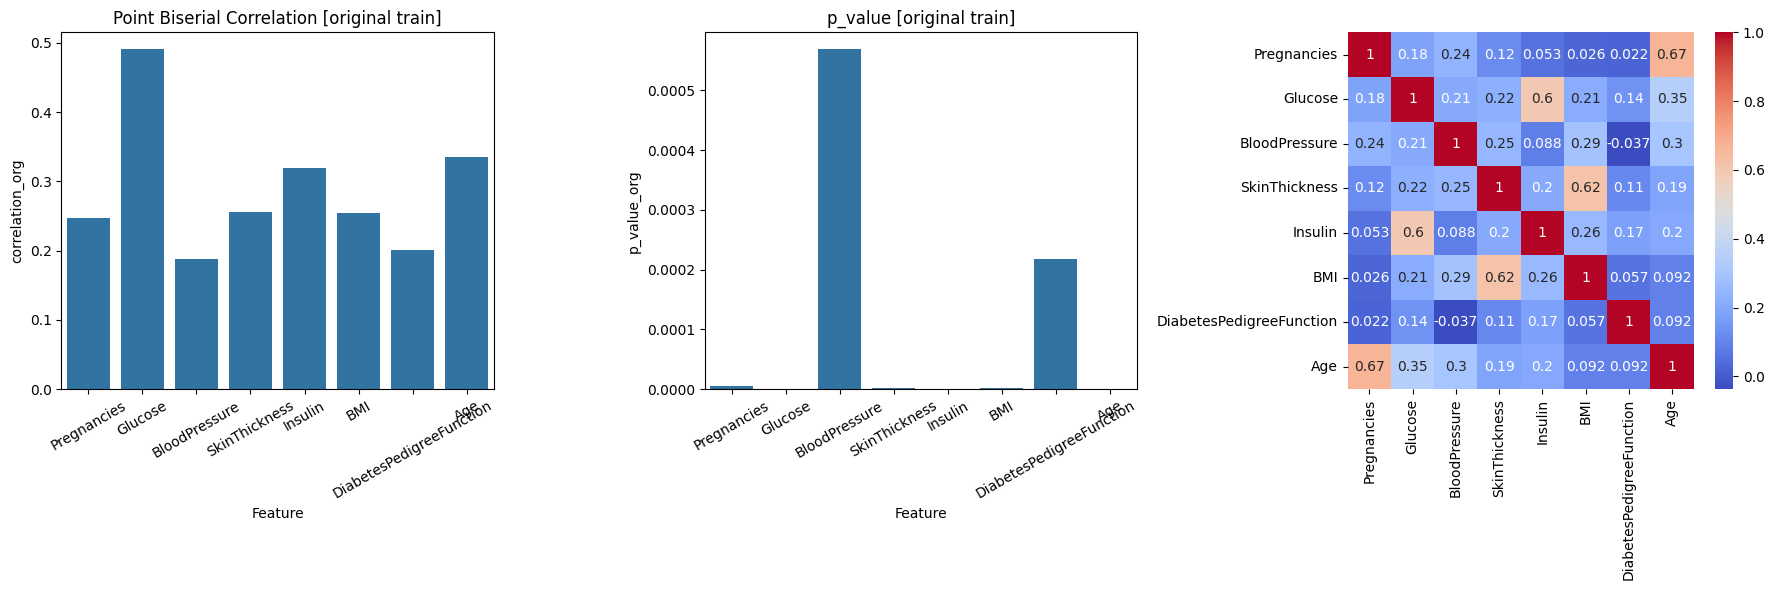

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

correlation_org_lst, correlation_dealout_lst = [], []
p_value_org_lst, p_value_dealout_lst = [], []


# 점 이연 상관계수 계산 및 출력
for feature in features_org:

    correlation_org, p_value_org = pointbiserialr(train_normal[feature], train_normal['Outcome'])
    correlation_org_lst.append(correlation_org)
    p_value_org_lst.append(p_value_org)


# 데이터프레임 생성
correlation_dict = {'Feature': features_org,
                    'correlation_org': correlation_org_lst,
                    'p_value_org' : p_value_org_lst }

correlation_df = pd.DataFrame(correlation_dict)

display(correlation_df)


plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.barplot(x='Feature', y='correlation_org', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [original train]")
plt.gca().set_xticklabels(features_org, rotation=30)

plt.subplot(1,3,2)
sns.barplot(x='Feature', y='p_value_org', data=correlation_df)
plt.gca().set_xticklabels(features_org, rotation=30)
plt.gca().set_title("p_value [original train]")

plt.subplot(1,3,3)
sns.heatmap(train_normal[features_org].corr(), cmap = "coolwarm", annot= True )

plt.tight_layout()
plt.show()

### 6. train_normal 데이터에 feature 조합 통한 새로운 feature 생성하기 (1)


BloodPressure와 BMI를 더한 값이 교차 검증 성능이 제일 높다.

In [18]:
from sklearn.ensemble import RandomForestClassifier

# 피처 후보 생성
train_normal_try1 = train_normal.copy()

train_normal_try1['BloodPressure_BMI_Diff'] = train_normal_try1['BloodPressure'] -  train_normal_try1['BMI']
train_normal_try1['BloodPressure_BMI_Sum'] = train_normal_try1['BloodPressure'] + train_normal_try1['BMI']

train_normal_try1['BMI'] = train_normal_try1['BMI'].replace(0, train_normal_try1['BMI'].median())
train_normal_try1['BloodPressure_BMI_Ratio'] = train_normal_try1['BloodPressure'] / train_normal_try1['BMI']

train_normal_try1_x = train_normal_try1.drop('Outcome', axis=1)

features_to_evaluate = ['BloodPressure_BMI_Diff', 'BloodPressure_BMI_Sum', 'BloodPressure_BMI_Ratio']

rf_model = RandomForestClassifier(random_state = 42)

# 교차 검증 성능 비교
cv_scores = {}

for feature in features_to_evaluate:
    train_normal_add_x = train_normal[features_org].copy()
    train_normal_add_x[feature] = train_normal_try1[feature]
    scores = cross_val_score(rf_model, train_normal_add_x, train_normal_y, cv=kf, scoring='accuracy')
    cv_scores[feature] = scores.mean()

display(f"accuracy : {cv_scores}")

"accuracy : {'BloodPressure_BMI_Diff': 0.769399024670109, 'BloodPressure_BMI_Sum': 0.8023164084911073, 'BloodPressure_BMI_Ratio': 0.7903399311531842}"

### 7. train_normal 데이터에 feature 그룹화 통한 새로운 feature 생성하기


새로 추가된 피처를 포함한 데이터로 교차 검증을 수행한 결과 정확도는 약 79.93%이다. baseline 교차 검증 성능(0.79)보다 향상된 결과로서, 당뇨병 발병 여부에 대한 설명력 높은 의미 있는 피처일 가능성이 매우 높다.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.preprocessing import LabelEncoder

train_normal_try2 = train_normal.copy()

# BloodPressure의 사분위수 계산
q1 = np.percentile(train_normal_try2['BloodPressure'], 25)
q2 = np.percentile(train_normal_try2['BloodPressure'], 50)
q3 = np.percentile(train_normal_try2['BloodPressure'], 75)
q4 = np.percentile(train_normal_try2['BloodPressure'], 100)

# BloodPressure를 2개의 범주로 나누기
q_BloodPressure_lst = [ 0, q1, q4]
BloodPressure_labels_train = pd.cut(train_normal_try2['BloodPressure'], bins = q_BloodPressure_lst, labels = ['q1', 'q2'])

# LabelEncoder로 범주형 데이터 인코딩
le_train_ = LabelEncoder()
train_normal_try2['BloodPressure_cat'] = le_train_.fit_transform(BloodPressure_labels_train)

# "BloodPressure_cat" 범주에 따른 "DiabetesPedigreeFunction"의 빈도수 계산
train_normal_try2['DiabetesPedigreeFunction_by_BloodPressure_cat'] = train_normal_try2.groupby('BloodPressure_cat')['DiabetesPedigreeFunction'].transform('count')

# BloodPressure_cat" 범주에 따른 "DiabetesPedigreeFunction"의 빈도수 dict형태로 backup
DPF_counts_by_BloodPressure_cat_train = train_normal_try2.groupby('BloodPressure_cat')['DiabetesPedigreeFunction'].count().to_dict()
display(DPF_counts_by_BloodPressure_cat_train)

# 피처가 추가된 데이터로 교차 검증 수행
train_normal_try2_x = train_normal_try2.drop(['ID', 'Outcome','BloodPressure_cat'], axis=1)
rf_model = RandomForestClassifier(random_state = 42)

# 결과 출력
cv_result_try = cross_val_score(rf_model, train_normal_try2_x, train_normal_y, cv=kf, scoring='accuracy')
display(f"accuracy : { cv_result_try.mean()}")

display(train_normal_try2.head(5))

{0: 85, 1: 249}

'accuracy : 0.7993043602983362'

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_cat,DiabetesPedigreeFunction_by_BloodPressure_cat
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0,0,85
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0,1,249
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0,1,249
5,TRAIN_005,3,78,50,32,88,31.0,0.248,26,1,0,85
6,TRAIN_006,1,91,54,25,100,25.2,0.234,23,0,0,85


### 8. 새로 생성한 feature 추가하여 교차 검증 성능 확인 (2)


교차 검증 결과 평균 정확도는 약 79.92%이다. 이는 추가된 피처들이 모델의 성능에 긍정적인 영향을 미치고 있음을 나타낸다.

In [20]:
train_normal_prep = train_normal.copy()

train_normal_prep['BloodPressure_BMI_Sum'] = train_normal_try1['BloodPressure_BMI_Sum']
train_normal_prep['DiabetesPedigreeFunction_by_BloodPressure_cat'] = train_normal_try2['DiabetesPedigreeFunction_by_BloodPressure_cat']

# 점이연 상관 관계 유의성 없는 'BloodPressure', 'DiabetesPedigreeFunction' 제거
train_normal_prep = train_normal_prep.drop('BloodPressure', axis=1)
train_normal_prep = train_normal_prep.drop('DiabetesPedigreeFunction', axis=1)

train_normal_prep_x = train_normal_prep.drop(['ID','Outcome'], axis=1)

# RandomForestClassifier로 오버샘플링된 데이터에 대한 교차 검증
RF_model_prep = RandomForestClassifier(random_state=42)
cv_result_normal_prep = cross_validate(RF_model_prep, train_normal_prep_x, train_normal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal_prep = pd.DataFrame(cv_result_normal_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_normal_prep)
display(df_cv_result_normal_prep.describe().loc['mean',:].to_frame().T)

display(train_normal_prep_x.head(5))

,test_accuracy,test_precision,test_recall,test_f1
0,0.833333,0.809524,0.629630,0.708333
1,0.833333,0.740741,0.740741,0.740741
2,0.783133,0.722222,0.500000,0.590909
3,0.746988,0.615385,0.592593,0.603774


,test_accuracy,test_precision,test_recall,test_f1
mean,0.799197,0.721968,0.615741,0.660939


,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,BloodPressure_BMI_Sum,DiabetesPedigreeFunction_by_BloodPressure_cat
0,4,103,33,192,24.0,33,84.0,85
3,1,119,41,170,45.3,26,133.3,249
4,1,114,36,200,38.1,21,104.1,249
5,3,78,32,88,31.0,26,81.0,85
6,1,91,25,100,25.2,23,79.2,85


### 9. test_normal 데이터에 새로운 feature 생성하기


In [21]:
test_normal = test.copy()
test_normal = test_normal.loc[test_normal['Insulin'] != 0]

# 'BloodPressure_BMI_Sum' 생성
test_normal_prep = test_normal.copy()
test_normal_prep.loc[:,'BloodPressure_BMI_Sum'] = test_normal_prep['BloodPressure'] + test_normal_prep['BMI']

# 'DiabetesPedigreeFunction_by_BloodPressure_cat' 생성
BloodPressure_labels_test = pd.cut(test_normal_prep['BloodPressure'], bins = q_BloodPressure_lst, labels = ['q1', 'q2'])

test_normal_prep['BloodPressure_cat'] = le_train_.transform(BloodPressure_labels_test)

# "BloodPressure_cat" 범주 (train 데이터, train_normal_try1 기준)에 따른 "DiabetesPedigreeFunction"의 빈도수 (train 데이터, train_normal_try2의 통계치) 로 대입  
test_normal_prep['DiabetesPedigreeFunction_by_BloodPressure_cat'] = test_normal_prep['BloodPressure_cat'].apply(lambda x: DPF_counts_by_BloodPressure_cat_train.get(x)) 

# 불필요한 feature 제거

test_normal_prep = test_normal_prep.drop('BloodPressure_cat', axis=1)
test_normal_prep = test_normal_prep.drop('BloodPressure', axis=1)
test_normal_prep = test_normal_prep.drop('DiabetesPedigreeFunction', axis=1)

display(test_normal_prep.head(7))

,ID,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,BloodPressure_BMI_Sum,DiabetesPedigreeFunction_by_BloodPressure_cat
1,TEST_001,3,107,13,48,22.9,23,84.9,85
4,TEST_004,1,107,30,82,30.8,24,102.8,249
5,TEST_005,1,79,42,48,43.5,23,103.5,85
6,TEST_006,0,188,14,185,32.0,22,114.0,249
7,TEST_007,12,140,43,325,39.2,58,121.2,249
8,TEST_008,0,93,39,72,43.4,35,143.4,249
10,TEST_010,1,126,29,152,28.7,21,84.7,85


### 10. 전처리 및 피처 엔지니어링 처리된 train, test 데이터 저장하기¶


In [22]:
train_normal_prep.to_csv("data/diabete/train_normal_prep.csv", index = False)
test_normal_prep.to_csv("data/diabete/test_normal_prep.csv", index = False)

display(train_normal_prep.head(7))

,ID,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome,BloodPressure_BMI_Sum,DiabetesPedigreeFunction_by_BloodPressure_cat
0,TRAIN_000,4,103,33,192,24.0,33,0,84.0,85
3,TRAIN_003,1,119,41,170,45.3,26,0,133.3,249
4,TRAIN_004,1,114,36,200,38.1,21,0,104.1,249
5,TRAIN_005,3,78,32,88,31.0,26,1,81.0,85
6,TRAIN_006,1,91,25,100,25.2,23,0,79.2,85
7,TRAIN_007,5,117,30,105,39.1,42,0,125.1,249
9,TRAIN_009,1,167,17,144,23.4,33,1,97.4,249


## 스테이지 7. 결측치 그룹에 대한 데이터 전처리 및 피처 엔지니어링

### 1. 데이터 읽어오기


In [35]:
import pandas as pd

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

### 2. 인슐린 결측치 데이터(train_abnormal) 추출


In [36]:
features_org = list(train.columns)[1:-1]

#  train 데이터에서 Insulin이 0(결측치)인 데이터 추출
train_abnormal = train.copy()
train_abnormal = train_abnormal.loc[train_abnormal['Insulin'] == 0]

test_abnormal = test.copy()
test_abnormal = test_abnormal.loc[test_abnormal['Insulin'] == 0]
display(train_abnormal.head(5))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
8,TRAIN_008,1,124,60,32,0,35.8,0.514,21,0
10,TRAIN_010,4,145,82,18,0,32.5,0.235,70,1
15,TRAIN_015,5,103,108,37,0,39.2,0.305,65,0


### 3. train_abnormal에 대한 기본 교차 검증 성능 확인


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold

train_abnormal_x = train_abnormal[features_org]
train_abnormal_y = train_abnormal['Outcome']

kf = KFold(n_splits=4, shuffle=True, random_state=42)

RF_model_abnormal = RandomForestClassifier(random_state = 42)

cv_result_abnormal = cross_validate(RF_model_abnormal, train_abnormal_x, train_abnormal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal = pd.DataFrame(cv_result_abnormal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(cv_result_abnormal)
display(df_cv_result_abnormal)
display(df_cv_result_abnormal.describe().loc['mean',:].to_frame().T)

{'fit_time': array([0.06932998, 0.05653501, 0.05755591, 0.05778384]),
 'score_time': array([0.00550127, 0.00551152, 0.00500035, 0.00500011]),
 'test_accuracy': array([0.725     , 0.7375    , 0.74683544, 0.72151899]),
 'test_precision': array([0.7826087 , 0.5625    , 0.80769231, 0.55555556]),
 'test_recall': array([0.51428571, 0.72      , 0.58333333, 0.6       ]),
 'test_f1': array([0.62068966, 0.63157895, 0.67741935, 0.57692308])}

,test_accuracy,test_precision,test_recall,test_f1
0,0.725000,0.782609,0.514286,0.620690
1,0.737500,0.562500,0.720000,0.631579
2,0.746835,0.807692,0.583333,0.677419
3,0.721519,0.555556,0.600000,0.576923


,test_accuracy,test_precision,test_recall,test_f1
mean,0.732714,0.677089,0.604405,0.626653


### 4. 인슐린 결측 데이터 (train_abnormal)에 'SkinThickness' 결측치 처리


In [38]:
train_applied = train.copy()
from sklearn.preprocessing import StandardScaler

# 'SkinThickness' 결측치 대체에 사용할 feature 선택
features_for_skin = ['Pregnancies', 'Glucose', 'BloodPressure',  'BMI', 'DiabetesPedigreeFunction', 'Age']

# 'SkinThickness' 값이 0인 데이터와 그렇지 않은 데이터로 분리
train_normal_skin = train_applied[train_applied['SkinThickness'] != 0]

train_normal_skin_x = train_normal_skin[features_for_skin]
train_normal_skin_y = train_normal_skin['SkinThickness']

scaler_reg_train = StandardScaler()
train_normal_skin_x_scaled = scaler_reg_train.fit_transform(train_normal_skin_x)

display(train[features_for_skin].head(5))
display(pd.DataFrame(train_normal_skin_x_scaled, columns = features_for_skin).head(5))

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,4,103,60,24.0,0.966,33
1,10,133,68,27.0,0.245,36
2,4,112,78,39.4,0.236,38
3,1,119,88,45.3,0.507,26
4,1,114,66,38.1,0.289,21


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.131861,-0.519744,-0.852777,-1.282968,1.340931,0.110916
1,0.131861,-0.246380,0.526760,1.009190,-0.754366,0.570050
2,-0.785812,-0.033763,1.293169,1.887355,0.023477,-0.531872
3,-0.785812,-0.185632,-0.392932,0.815697,-0.602242,-0.991006
4,-0.174030,-1.279088,-1.619187,-0.241078,-0.719923,-0.531872


### 5. 인슐린 결측 데이터 (train_abnormal)에 'SkinThickness' 결측치 처리 (계속)


train 데이터셋에는 SkinThickness의 결측치가 195개가 있었지만, 아래의 코드를 통해 결측치가 없는 데이터셋을 얻었다.

In [39]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(train_normal_skin_x_scaled, train_normal_skin_y)

####################################################################
# 학습된 SVC 모델로 'SkinThickness' 결측치 데이터를 예측 대체
####################################################################

train_missing_skin = train_applied[train_applied['SkinThickness'] == 0]
train_missing_skin_x = train_missing_skin[features_for_skin]

train_missing_skin_x_scaled = scaler_reg_train.transform(train_missing_skin_x)

# 결측치가 있는 데이터에 대한 'SkinThickness' 값을 예측
predicted_skin = svm_model.predict(train_missing_skin_x_scaled)

# 예측된 값으로 'SkinThickness' 결측치 대체
train_missing_skin = train_missing_skin.copy()
train_missing_skin['SkinThickness'] = predicted_skin

####################################################################
# 처리된 데이터를 병합
####################################################################
train_dealed_missing_skin = pd.concat([train_normal_skin, train_missing_skin]).sort_index()

display(f"train 결측치 개수 : {len(train[train['SkinThickness'] == 0])}")
display(f"train_dealed_missing_skin 결측치 개수 : {len(train_dealed_missing_skin[train_dealed_missing_skin['SkinThickness'] == 0])}")

'train 결측치 개수 : 195'

'train_dealed_missing_skin 결측치 개수 : 0'

### 6. 'SkinThickness' 결측치 처리후 교차 검증 성능 확인


train_abnormal에 대한교차 검증 성능보다 향상되었다.

정확도: 73.27% -> 74.5%

In [40]:
# 인슐인 결측치 데이터셋 추출
train_abnormal_prep = train_dealed_missing_skin[train_dealed_missing_skin['Insulin'] == 0]
train_abnormal_prep_x = train_abnormal_prep[features_org]


kf = KFold(n_splits=4, shuffle=True, random_state=42)

# RandomForestClassifier로 교차 검증 진행
RF_model_abnormal_prep = RandomForestClassifier(random_state = 42)
cv_result_abnormal_prep = cross_validate(RF_model_abnormal_prep, train_abnormal_prep_x, train_abnormal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal_prep = pd.DataFrame(cv_result_abnormal_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_abnormal_prep)
display(df_cv_result_abnormal_prep.describe().loc['mean',:].to_frame().T)

display(f"train_abnormal_prep : {list(train_abnormal_prep.columns)}")

,test_accuracy,test_precision,test_recall,test_f1
0,0.712500,0.750000,0.514286,0.610169
1,0.737500,0.562500,0.720000,0.631579
2,0.784810,0.880000,0.611111,0.721311
3,0.746835,0.592593,0.640000,0.615385


,test_accuracy,test_precision,test_recall,test_f1
mean,0.745411,0.696273,0.621349,0.644611


"train_abnormal_prep : ['ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']"

### 7. 'SkinThickness' 결측치 처리후 교차 검증 성능 향상 근거 확인


SkinThickness 결측치 처리 후 p-value가 낮아진 것을 확인할 수 있다.

C:\Users\CHOYS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Feature,correlation_abnormal,p_value_abnormal,correlation_abnormal_prep,p_value_abnormal_prep
0,Pregnancies,0.163010,3.557253e-03,0.163010,3.557253e-03
1,Glucose,0.437756,2.554395e-16,0.437756,2.554395e-16
2,BloodPressure,-0.008945,8.737608e-01,-0.008945,8.737608e-01
3,SkinThickness,0.008564,8.790970e-01,0.232579,2.805302e-05
4,Insulin,NaN,NaN,NaN,NaN
5,BMI,0.344766,2.638926e-10,0.344766,2.638926e-10
6,DiabetesPedigreeFunction,0.169882,2.368764e-03,0.169882,2.368764e-03
7,Age,0.108246,5.380991e-02,0.108246,5.380991e-02


C:\Users\CHOYS\AppData\Local\Temp\ipykernel_6140\581732599.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(feature_lst, rotation=30)
C:\Users\CHOYS\AppData\Local\Temp\ipykernel_6140\581732599.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(feature_lst, rotation=30)
C:\Users\CHOYS\AppData\Local\Temp\ipykernel_6140\581732599.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(feature_lst, rotation=30)
C:\Users\CHOYS\AppData\Local\Temp\ipykernel_6140\581732599.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(feature_lst, rotation=30)


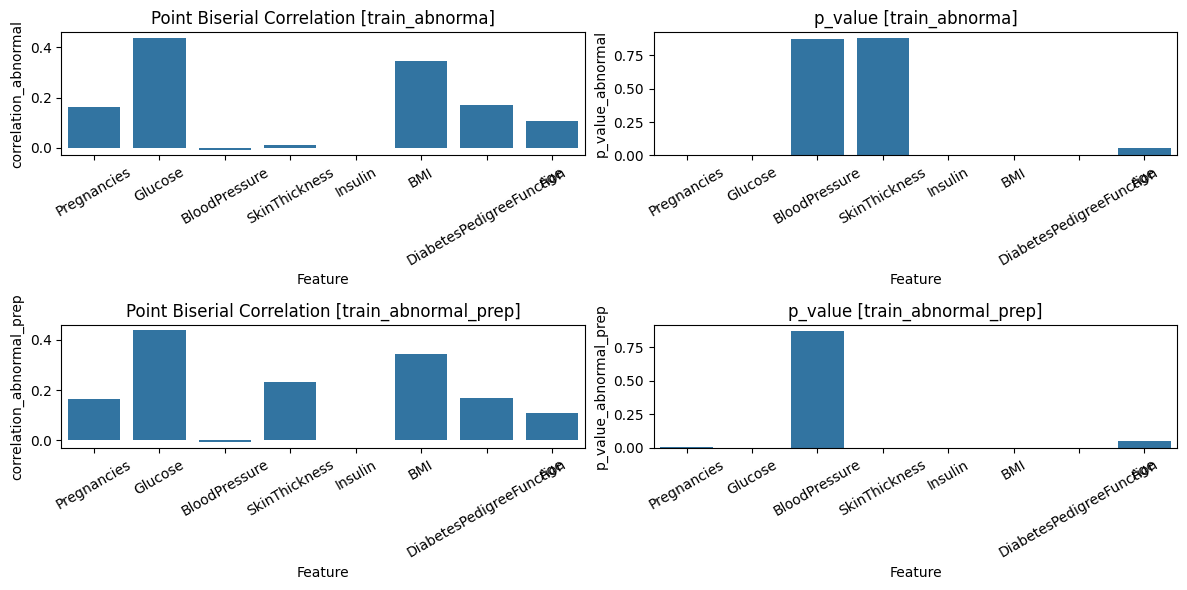

In [41]:
from scipy.stats import pointbiserialr

correlation_abnormal_lst, correlation_abnormal_prep_lst = [], []
p_value_abnormal_lst, p_value_abnormal_prep_lst = [], []

feature_lst = train.columns[1:-1].to_list()

# 점 이연 상관계수 계산 및 출력
for feature in feature_lst:
    correlation_abnormal, p_value_abnormal = pointbiserialr(train_abnormal[feature], train_abnormal['Outcome'])
    correlation_abnormal_lst.append(correlation_abnormal)
    p_value_abnormal_lst.append(p_value_abnormal)


# 점 이연 상관계수 계산 및 출력
for feature in feature_lst:
    correlation_abnormal_prep, p_value_abnormal_prep = pointbiserialr(train_abnormal_prep[feature], train_abnormal_prep['Outcome'])
    correlation_abnormal_prep_lst.append(correlation_abnormal_prep)
    p_value_abnormal_prep_lst.append(p_value_abnormal_prep)


# 데이터프레임 생성
correlation_dict = {'Feature': feature_lst,
                    'correlation_abnormal': correlation_abnormal_lst,
                    'p_value_abnormal' : p_value_abnormal_lst,
                    'correlation_abnormal_prep': correlation_abnormal_prep_lst,
                    'p_value_abnormal_prep' : p_value_abnormal_prep_lst}

correlation_df = pd.DataFrame(correlation_dict)
display(correlation_df)


import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn barplot

plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
sns.barplot(x='Feature', y='correlation_abnormal', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [train_abnorma]")
plt.gca().set_xticklabels(feature_lst, rotation=30)

plt.subplot(2,2,2)
sns.barplot(x='Feature', y='p_value_abnormal', data=correlation_df)
plt.gca().set_xticklabels(feature_lst, rotation=30)
plt.gca().set_title("p_value [train_abnorma]")

plt.subplot(2,2,3)
sns.barplot(x='Feature', y='correlation_abnormal_prep', data=correlation_df)
plt.gca().set_title("Point Biserial Correlation [train_abnormal_prep]")
plt.gca().set_xticklabels(feature_lst, rotation=30)

plt.subplot(2,2,4)
sns.barplot(x='Feature', y='p_value_abnormal_prep', data=correlation_df)
plt.gca().set_xticklabels(feature_lst, rotation=30)
plt.gca().set_title("p_value [train_abnormal_prep]")

plt.tight_layout()
plt.show()

### 8. train_abnormal 데이터에 feature 조합 통한 새로운 feature 생성 하기


In [42]:
from sklearn.ensemble import RandomForestClassifier

# 피쳐 후보 생성
train_abnormal_try = train_abnormal_prep.copy()

train_abnormal_try['Pregnancies_Age_Diff'] = train_abnormal_try['Pregnancies'] - train_abnormal_try['Age']
train_abnormal_try['Pregnancies_Age_Sum'] = train_abnormal_try['Pregnancies'] + train_abnormal_try['Age']
train_abnormal_try['Pregnancies_Age_Ratio'] = train_abnormal_try['Pregnancies'] / train_abnormal_try['Age']

train_abnormal_try_x = train_abnormal_try.drop('Outcome', axis=1)

features_to_evaluate = ['Pregnancies_Age_Diff', 'Pregnancies_Age_Sum', 'Pregnancies_Age_Ratio']

rf_model = RandomForestClassifier(random_state = 42)

kf = KFold(n_splits=4, shuffle=True, random_state=42)

cv_scores = {}
for feature in features_to_evaluate:

    train_abnormal_add_x = train_abnormal_prep[features_org].copy()

    train_abnormal_add_x[feature] = train_abnormal_try[feature]

    scores = cross_val_score(rf_model, train_abnormal_add_x, train_abnormal_y, cv=kf, scoring='accuracy')
    cv_scores[feature] = scores.mean()

display(f"accuracy : {cv_scores}")

"accuracy : {'Pregnancies_Age_Diff': 0.7264636075949367, 'Pregnancies_Age_Sum': 0.7327531645569619, 'Pregnancies_Age_Ratio': 0.7265822784810126}"

### 9. train_abnormal 데이터에 feature 그룹화 조합 통한 새로운 feature 생성


In [45]:
# 피쳐 후보 생성
train_abnormal_try = train_abnormal_prep.copy()

train_abnormal_try['Skin_BMI_Diff'] = train_abnormal_try['SkinThickness'] - train_abnormal_try['BMI']
train_abnormal_try['Skin_BMI_Sum'] = train_abnormal_try['SkinThickness'] + train_abnormal_try['BMI']

bmi_mean = train_abnormal_try[train_abnormal_try['BMI'] !=0]['BMI'].mean()
train_abnormal_try['BMI'] =  train_abnormal_try['BMI'].replace(0, bmi_mean)
train_abnormal_try['Skin_BMI_Ratio'] = train_abnormal_try['SkinThickness'] / train_abnormal_try['BMI']

train_abnormal_try_x = train_abnormal_try.drop('Outcome', axis=1)

features_to_evaluate = ['Skin_BMI_Diff', 'Skin_BMI_Sum', 'Skin_BMI_Ratio']

rf_model = RandomForestClassifier(random_state = 42)

# a) 교차 검증 성능 비교
kf = KFold(n_splits=4, shuffle=True, random_state=42)

#display(train_abnormal_y)

cv_scores = {}
for feature in features_to_evaluate:

    train_abnormal_add_x = train_abnormal_prep[features_org].copy()
    train_abnormal_add_x[feature] = train_abnormal_try[feature]
   
    scores = cross_val_score(rf_model, train_abnormal_add_x, train_abnormal_y, cv=kf, scoring='accuracy')
    cv_scores[feature] = scores.mean()

display(f"accuracy : {cv_scores}")

train_abnormal_prep.loc[:, 'Skin_BMI_Ratio'] = train_abnormal_try['Skin_BMI_Ratio'].copy()

display(f"train_abnormal_prep : {list(train_abnormal_prep.columns)}")
display(train_abnormal_prep.values.shape)

"accuracy : {'Skin_BMI_Diff': 0.7328322784810126, 'Skin_BMI_Sum': 0.7359177215189873, 'Skin_BMI_Ratio': 0.742246835443038}"

"train_abnormal_prep : ['ID', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Skin_BMI_Ratio']"

(318, 11)

### 10. train_abnormal 데이터에 선형 판별법 (LDA) 통한 데이터 생성¶


In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA에 사용하는 데이터셋 준비
features_for_lda = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Insulin', 'DiabetesPedigreeFunction', 'Age' ]

train_abnormal_try = train_abnormal_prep.copy()[features_for_lda]

scaler_for_lda = StandardScaler()
train_abnormal_try_scaled = scaler_for_lda.fit_transform(train_abnormal_try)

lda_abnormal = LDA()
train_lda_arr = lda_abnormal.fit_transform(train_abnormal_try_scaled, train_abnormal_y)
train_lda = pd.DataFrame(train_lda_arr, columns =['lda'])

# LDA를 통해 변환된 값을 원래의 데이터프레임에 추가
train_abnormal_prep = train_abnormal_prep.reset_index(drop=True)  # 인덱스 리셋
train_abnormal_prep['lda'] = train_lda['lda']

features_prep = features_org + ['Skin_BMI_Ratio', 'lda']
train_abnormal_prep_x = train_abnormal_prep[features_prep].copy()


# 교차 검증
RF_model_lda = RandomForestClassifier(random_state=42)
cv_result_abnormal_prep = cross_validate(RF_model_lda, train_abnormal_prep_x, train_abnormal_y, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])

df_cv_result_abnormal_prep = pd.DataFrame(cv_result_abnormal_prep, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_abnormal_prep)
display(df_cv_result_abnormal_prep.describe().loc['mean',:].to_frame().T)

display(train_abnormal_prep_x.head(5))
display(train_abnormal_prep.values.shape)

,test_accuracy,test_precision,test_recall,test_f1
0,0.725000,0.809524,0.485714,0.607143
1,0.775000,0.612903,0.760000,0.678571
2,0.772152,0.950000,0.527778,0.678571
3,0.721519,0.551724,0.640000,0.592593


,test_accuracy,test_precision,test_recall,test_f1
mean,0.748418,0.731038,0.603373,0.63922


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin_BMI_Ratio,lda
0,10,133,68,28.420336,0,27.0,0.245,36,1.052605,0.382441
1,4,112,78,40.000000,0,39.4,0.236,38,1.015228,0.081416
2,1,124,60,32.000000,0,35.8,0.514,21,0.893855,0.278410
3,4,145,82,18.000000,0,32.5,0.235,70,0.553846,0.370773
4,5,103,108,37.000000,0,39.2,0.305,65,0.943878,-0.373802


(318, 12)

### 11. test_abnormal 데이터에 'SkinThickness' 결측치 처리¶


In [47]:
test_applied = test.copy()

# 'SkinThickness' 값이 0인 데이터와 그렇지 않은 데이터로 분리
test_normal_skin = test_applied[test_applied['SkinThickness'] != 0]

# 학습
test_normal_skin_x = test_normal_skin[features_for_skin]
test_normal_skin_y = test_normal_skin['SkinThickness']

# 학습 데이터에서 학습된 scaler와 모델 사용
test_normal_skin_x_scaled = scaler_reg_train.transform(test_normal_skin_x)  # 학습 데이터의 scaler 사용

# 예측
test_missing_skin = test_applied[test_applied['SkinThickness'] == 0]
test_missing_skin_x = test_missing_skin[features_for_skin]

test_missing_skin_x_scaled = scaler_reg_train.transform(test_missing_skin_x)

# 결측치가 있는 데이터에 대한 'SkinThickness' 값을 예측
predicted_skin = svm_model.predict(test_missing_skin_x_scaled)

# 예측된 값으로 'SkinThickness' 결측치 대체
test_missing_skin = test_missing_skin.copy()
test_missing_skin.loc[:, 'SkinThickness'] = predicted_skin


# 처리된 데이터를 병합
test_dealed_missing_skin = pd.concat([test_normal_skin, test_missing_skin]).sort_index()

# 인슐인 결측치 데이터셋 추출
test_abnormal_prep = test_dealed_missing_skin[test_dealed_missing_skin['Insulin'] == 0]
test_abnormal_prep_x = test_abnormal_prep[features_org]
display(test_dealed_missing_skin.head())

display(f"test 결측치 개수 : {len(test[test['SkinThickness'] == 0])}")
display(f"test_dealed_missing_skin 결측치 개수 : {len(test_dealed_missing_skin[test_dealed_missing_skin['SkinThickness'] == 0])}")

C:\Users\CHOYS\AppData\Local\Temp\ipykernel_6140\1088826070.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[33.95676309 30.46405204 28.95319859 28.90992508 23.11579918 32.41535492
 19.48750352 28.86665667 29.50109597 28.72493688 19.87238696 29.58726339
 36.14909694 21.48374953 28.11565023 29.03440355 32.28661412 37.55726051
 32.11069856 25.67791598 20.29821187 28.43720288 27.86782898 31.56112819
 30.81535883 38.32744176 29.46627086 27.0611511  29.2699217  28.54520977
 34.38267098 29.43984539]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_missing_skin.loc[:, 'SkinThickness'] = predicted_skin


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,33.956763,0,37.8,0.261,41
1,TEST_001,3,107,62,13.000000,48,22.9,0.678,23
2,TEST_002,3,113,44,13.000000,0,22.4,0.140,22
3,TEST_003,6,190,92,30.464052,0,35.5,0.278,66
4,TEST_004,1,107,72,30.000000,82,30.8,0.821,24


'test 결측치 개수 : 32'

'test_dealed_missing_skin 결측치 개수 : 0'

### 12. test_abnormal 데이터에 'Skin_BMI_Ratio' 피쳐 생성¶


In [48]:
test_abnormal_prep = test_abnormal_prep.copy()

mean_bmi_train = train_abnormal_prep[train_abnormal_prep['BMI'] != 0]['BMI'].mean()
test_abnormal_prep.loc[:, 'BMI'] = test_abnormal_prep['BMI'].replace(0, mean_bmi_train)

test_abnormal_prep.loc[:, 'Skin_BMI_Ratio'] = test_abnormal_prep['SkinThickness'] / test_abnormal_prep['BMI']

display(test_abnormal_prep.head(5))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin_BMI_Ratio
0,TEST_000,5,112,66,33.956763,0,37.8,0.261,41,0.898327
2,TEST_002,3,113,44,13.000000,0,22.4,0.140,22,0.580357
3,TEST_003,6,190,92,30.464052,0,35.5,0.278,66,0.858142
9,TEST_009,0,109,88,30.000000,0,32.5,0.855,38,0.923077
13,TEST_013,4,95,60,32.000000,0,35.4,0.284,28,0.903955


### 13. test_abnormal 데이터에 선형 판별법 (LDA) 통한 새로운 피쳐 생성¶


In [49]:
# 데이터 복사
test_abnormal_try = test_abnormal_prep.copy()[features_for_lda]

# 데이터 정규화
test_abnormal_try_scaled = scaler_for_lda.transform(test_abnormal_try)

# LDA 적용
test_lda_arr = lda_abnormal.transform(test_abnormal_try_scaled)
test_lda = pd.DataFrame(test_lda_arr, columns =['lda'])

test_abnormal_prep = test_abnormal_prep.reset_index(drop=True)  # 인덱스 리셋
test_abnormal_prep['lda'] = test_lda['lda']

display(test_abnormal_prep.head())

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin_BMI_Ratio,lda
0,TEST_000,5,112,66,33.956763,0,37.8,0.261,41,0.898327,0.236292
1,TEST_002,3,113,44,13.000000,0,22.4,0.140,22,0.580357,-0.888756
2,TEST_003,6,190,92,30.464052,0,35.5,0.278,66,0.858142,1.795718
3,TEST_009,0,109,88,30.000000,0,32.5,0.855,38,0.923077,-0.504217
4,TEST_013,4,95,60,32.000000,0,35.4,0.284,28,0.903955,-0.371583


### 14. 전처리 및 피쳐 엔지니어링 처리된 train, test 데이터 저장하기


In [50]:
# train_abnormal_prep 저장하기
train_abnormal_prep.to_csv("data/diabete/train_abnormal_prep.csv", index = False)

# test_abnormal_prep 저장하기
test_abnormal_prep.to_csv("data/diabete/test_abnormal_prep.csv", index = False)

## 스테이지 8

### 1. 데이터 읽어오기¶


In [51]:
import pandas as pd

train = pd.read_csv('data/diabete/train.csv')
test = pd.read_csv('data/diabete/test.csv')
submission = pd.read_csv('data/diabete/sample_submission.csv')

display(test.head())

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,TEST_000,5,112,66,0,0,37.8,0.261,41
1,TEST_001,3,107,62,13,48,22.9,0.678,23
2,TEST_002,3,113,44,13,0,22.4,0.140,22
3,TEST_003,6,190,92,0,0,35.5,0.278,66
4,TEST_004,1,107,72,30,82,30.8,0.821,24


### 2. 전처리 및 피쳐 엔지니어링 완료된 데이터 읽어오기 (1)¶


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

train_normal_prep = pd.read_csv('data/diabete/train_normal_prep.csv')
train_normal_prep_y = train_normal_prep['Outcome']
train_normal_prep_x = train_normal_prep.drop(['ID', 'Outcome'], axis=1)

test_normal_prep = pd.read_csv('data/diabete/test_normal_prep.csv')
test_normal_prep_x = test_normal_prep.drop('ID', axis=1)

features_normal_selected = train_normal_prep_x.columns

display(train_normal_prep.head(5))
display(test_normal_prep.head(5))

,ID,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome,BloodPressure_BMI_Sum,DiabetesPedigreeFunction_by_BloodPressure_cat
0,TRAIN_000,4,103,33,192,24.0,33,0,84.0,85
1,TRAIN_003,1,119,41,170,45.3,26,0,133.3,249
2,TRAIN_004,1,114,36,200,38.1,21,0,104.1,249
3,TRAIN_005,3,78,32,88,31.0,26,1,81.0,85
4,TRAIN_006,1,91,25,100,25.2,23,0,79.2,85


,ID,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,BloodPressure_BMI_Sum,DiabetesPedigreeFunction_by_BloodPressure_cat
0,TEST_001,3,107,13,48,22.9,23,84.9,85
1,TEST_004,1,107,30,82,30.8,24,102.8,249
2,TEST_005,1,79,42,48,43.5,23,103.5,85
3,TEST_006,0,188,14,185,32.0,22,114.0,249
4,TEST_007,12,140,43,325,39.2,58,121.2,249


### 3. 전처리 및 피쳐 엔지니어링 완료된 데이터 읽어오기 (2)¶


In [53]:
train_abnormal_prep = pd.read_csv('data/diabete/train_abnormal_prep.csv')

train_abnormal_prep_y = train_abnormal_prep['Outcome']
train_abnormal_prep_x = train_abnormal_prep.drop(['ID', 'Outcome'], axis=1)

features_abnormal_selected = train_abnormal_prep_x.columns

######################################################################################################################
test_abnormal_prep = pd.read_csv('data/diabete/test_abnormal_prep.csv')
test_abnormal_prep_x = test_abnormal_prep.drop('ID', axis=1)

display(train_abnormal_prep.head(5))
display(test_abnormal_prep.head(5))

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Skin_BMI_Ratio,lda
0,TRAIN_001,10,133,68,28.420336,0,27.0,0.245,36,0,1.052605,0.382441
1,TRAIN_002,4,112,78,40.000000,0,39.4,0.236,38,0,1.015228,0.081416
2,TRAIN_008,1,124,60,32.000000,0,35.8,0.514,21,0,0.893855,0.278410
3,TRAIN_010,4,145,82,18.000000,0,32.5,0.235,70,1,0.553846,0.370773
4,TRAIN_015,5,103,108,37.000000,0,39.2,0.305,65,0,0.943878,-0.373802


,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Skin_BMI_Ratio,lda
0,TEST_000,5,112,66,33.956763,0,37.8,0.261,41,0.898327,0.236292
1,TEST_002,3,113,44,13.000000,0,22.4,0.140,22,0.580357,-0.888756
2,TEST_003,6,190,92,30.464052,0,35.5,0.278,66,0.858142,1.795718
3,TEST_009,0,109,88,30.000000,0,32.5,0.855,38,0.923077,-0.504217
4,TEST_013,4,95,60,32.000000,0,35.4,0.284,28,0.903955,-0.371583


### 4. 교차 검증 성능 재확인하기


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold,StratifiedKFold

kf_normal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
kf_abnormal = KFold(n_splits=4, shuffle=True, random_state=42)

display("############  [ RandomForestClassifier ] ######################################")
print("\n")

display("인슐린 정상 데이터 (test_normal_prep)에 대한 교차 검증 성능")

RF_model_normal = RandomForestClassifier(random_state = 42)

cv_result_normal = cross_validate(RF_model_normal, train_normal_prep_x, train_normal_prep_y, cv=kf_normal, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal = pd.DataFrame(cv_result_normal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_normal.describe().loc['mean',:].to_frame().T)

display("인슐린 결측 데이터 (test_abnormal_prep)에 대한 교차 검증 성능")

RF_model_abnormal = RandomForestClassifier(random_state = 42)

cv_result_abnormal = cross_validate(RF_model_abnormal, train_abnormal_prep_x, train_abnormal_prep_y, cv=kf_abnormal, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal = pd.DataFrame(cv_result_abnormal, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

display(df_cv_result_abnormal.describe().loc['mean',:].to_frame().T)


'############  [ RandomForestClassifier ] ######################################'

'인슐린 정상 데이터 (test_normal_prep)에 대한 교차 검증 성능'

,test_accuracy,test_precision,test_recall,test_f1
mean,0.799197,0.721968,0.615741,0.660939


'인슐린 결측 데이터 (test_abnormal_prep)에 대한 교차 검증 성능'

,test_accuracy,test_precision,test_recall,test_f1
mean,0.748418,0.731038,0.603373,0.63922


### 5. 인슐린 정상 데이터에 RFECV 에 의한 feature selection 적용하기¶


In [55]:
from sklearn.feature_selection import RFECV
import time

start_time = time.time()

# RFECV를 이용한 특성 선택
rf_model_normal = RandomForestClassifier(random_state=42)
rfecv_normal = RFECV(estimator=rf_model_normal, step=1, cv=kf_normal, scoring='accuracy')
rfecv_normal = rfecv_normal.fit(train_normal_prep_x, train_normal_prep_y)

# 선택된 특성에 대한 데이터 준비
train_normal_prep_x_selected = train_normal_prep_x[train_normal_prep_x.columns[rfecv_normal.support_]]

# 교차 검증
cv_result_normal_selected = cross_validate(rf_model_normal, train_normal_prep_x_selected, train_normal_prep_y, cv=kf_normal, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_normal_selected = pd.DataFrame(cv_result_normal_selected, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

# 선택된 특성 출력 및 교차 검증 결과 출력

features_normal_selected = train_normal_prep_x.columns[rfecv_normal.support_]
display(f"selected features of train_normal_prep : {features_normal_selected}")
display(df_cv_result_normal_selected)
display(df_cv_result_normal_selected.describe().loc['mean',:].to_frame().T)

end_time = time.time()
display(f"total time elapse : {end_time-start_time}")

"selected features of train_normal_prep : Index(['Glucose', 'Insulin', 'BMI', 'Age', 'BloodPressure_BMI_Sum'], dtype='object')"

,test_accuracy,test_precision,test_recall,test_f1
0,0.845238,0.850000,0.629630,0.723404
1,0.821429,0.730769,0.703704,0.716981
2,0.795181,0.714286,0.576923,0.638298
3,0.759036,0.640000,0.592593,0.615385


,test_accuracy,test_precision,test_recall,test_f1
mean,0.805221,0.733764,0.625712,0.673517


'total time elapse : 2.7897591590881348'

### 6. 인슐린 정상 데이터에 대한 하이퍼 파라미터 튜닝¶


In [56]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

start_time = time.time()

# 파라미터의 분포 설정
param_dist = {
    'n_estimators': np.arange(100, 300, 50),
    'max_depth': [ 8, 16 ]
}

# feature selection


rf_model_normal = RandomForestClassifier(random_state = 42)

# GridSearchCV 설정
search_rf_normal = GridSearchCV(estimator=rf_model_normal, param_grid =param_dist,
                                    cv=kf_normal, verbose=2)


search_rf_normal.fit(train_normal_prep_x[features_normal_selected], train_normal_prep_y)

# 최적의 파라미터와 그 때의 점수 출력
print(f"Best parameters: {search_rf_normal.best_params_}")
print(f"Best cross-validated score: {search_rf_normal.best_score_}")


# 결과를 데이터프레임으로 변환
results_normal = pd.DataFrame(search_rf_normal.cv_results_)

# n_estimators와 max_depth에 따른 피벗 테이블 생성
pivot_table_normal = results_normal.pivot_table(values='mean_test_score',
                                  index='param_n_estimators',
                                  columns='param_max_depth')
end_time = time.time()
display(f"total time elapse : {end_time-start_time}")


Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=150; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=150; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=150; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=150; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=8, n_est

'total time elapse : 3.6430575847625732'

### 7. 인슐린 정상데이터에 대한 그리드 서치(GridSearchCV) 결과 시각화 하기 (1)¶


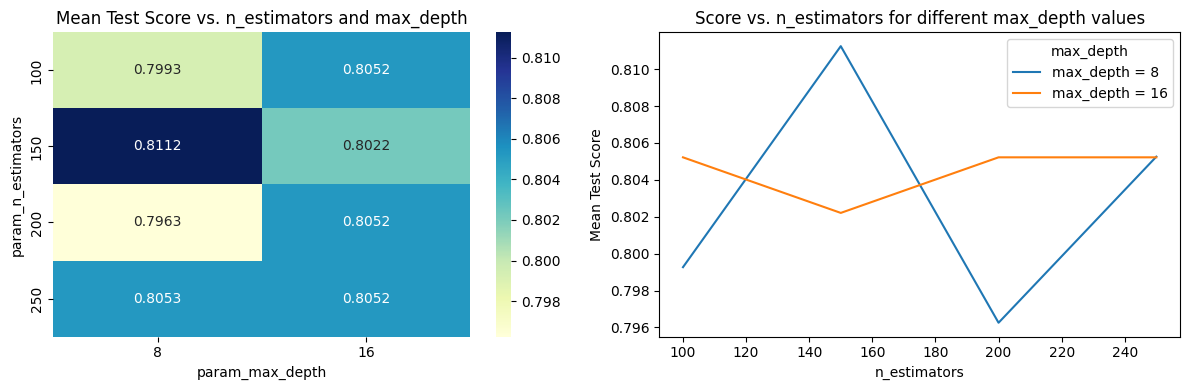

In [57]:
# 히트맵으로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("Mean Test Score vs. n_estimators and max_depth")
sns.heatmap(pivot_table_normal, annot=True, cmap='YlGnBu', fmt='.4g')

plt.subplot(1,2,2)
for col in pivot_table_normal.columns:
    plt.plot(pivot_table_normal[col], label=f'max_depth = {col}')  # 각 max_depth 값에 대한 선 그리기


plt.title("Score vs. n_estimators for different max_depth values")
plt.legend(title="max_depth")  # 범례의 제목을 'max_depth'로 설정
plt.xlabel("n_estimators")
plt.ylabel("Mean Test Score")
plt.tight_layout()

plt.show()



### 8. 인슐린 결측치 데이터에 RFECV 에 의한 feature selection 적용하기¶


In [58]:
start_time = time.time()

# RFECV를 이용한 특성 선택
rf_model_abnormal = RandomForestClassifier(random_state=42)
rfecv_abnormal = RFECV(estimator=rf_model_abnormal, step=1, cv=kf_abnormal, scoring='accuracy')
rfecv_abnormal = rfecv_normal.fit(train_abnormal_prep_x, train_abnormal_prep_y)

# 선택된 특성에 대한 데이터 준비
train_abnormal_prep_x_selected = train_abnormal_prep_x[train_abnormal_prep_x.columns[rfecv_abnormal.support_]]

# 교차 검증
cv_result_abnormal_selected = cross_validate(rf_model_normal, train_abnormal_prep_x_selected, train_abnormal_prep_y, cv=kf_abnormal, scoring=['accuracy', 'precision', 'recall', 'f1'])
df_cv_result_abnormal_selected = pd.DataFrame(cv_result_abnormal_selected, columns=['test_accuracy', 'test_precision', 'test_recall', 'test_f1'])

# 선택된 특성 출력 및 교차 검증 결과 출력

features_abnormal_selected = train_abnormal_prep_x.columns[rfecv_abnormal.support_]
display(f"selected features of train_abnormal_prep : {features_abnormal_selected}")
display(df_cv_result_abnormal_selected)
display(df_cv_result_abnormal_selected.describe().loc['mean',:].to_frame().T)

end_time = time.time()
display(f"total time elapse : {end_time-start_time}")

"selected features of train_abnormal_prep : Index(['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age',\n       'Skin_BMI_Ratio', 'lda'],\n      dtype='object')"

,test_accuracy,test_precision,test_recall,test_f1
0,0.737500,0.818182,0.514286,0.631579
1,0.725000,0.548387,0.680000,0.607143
2,0.772152,0.950000,0.527778,0.678571
3,0.734177,0.566667,0.680000,0.618182


,test_accuracy,test_precision,test_recall,test_f1
mean,0.742207,0.720809,0.600516,0.633869


'total time elapse : 3.21453595161438'

### 9. 인슐린 결측 데이터 에대한 하이퍼파라미터 튜닝¶


In [59]:
start_time = time.time()

kf = KFold(n_splits=4, shuffle=True, random_state=42)

# 파라미터의 분포 설정
param_dist = {
    'n_estimators': np.arange(100, 300, 50),
    'max_depth': [8, 16 ]
}


rf_model_abnormal = RandomForestClassifier(random_state=42)

search_rf_abnormal = GridSearchCV(estimator=rf_model_abnormal, param_grid =param_dist,
                                     cv=kf_abnormal, verbose=2)


search_rf_abnormal.fit(train_abnormal_prep_x[features_abnormal_selected], train_abnormal_prep_y)

# 최적의 파라미터와 그 때의 점수 출력
print(f"Best parameters: {search_rf_abnormal.best_params_}")
print(f"Best cross-validated score: {search_rf_abnormal.best_score_}")



# 결과를 데이터프레임으로 변환
results_abnormal = pd.DataFrame(search_rf_abnormal.cv_results_)

# n_estimators와 max_depth에 따른 피벗 테이블 생성
pivot_table_abnormal = results_abnormal.pivot_table(values='mean_test_score',
                                  index='param_n_estimators',
                                  columns='param_max_depth')


Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=150; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=150; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=150; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=150; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=200; total time=   0.0s
[CV] END ......................max_depth=8, n_estimators=200; total time=   0.1s
[CV] END ......................max_depth=8, n_est

### 10. 인슐린 결측 데이터에 대한 그리드 서치(GridSearchCV) 결과 시각화 하기¶


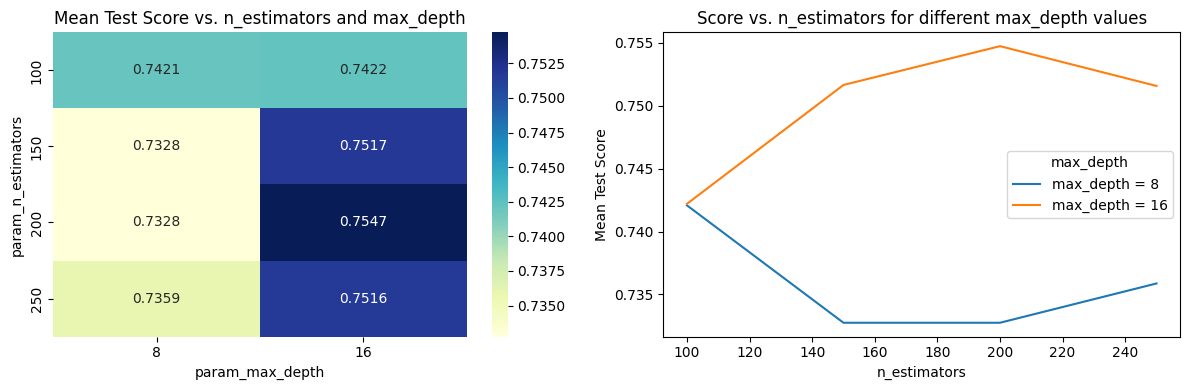

'total time elapse : 21.73827600479126'

In [60]:
# 히트맵으로 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title("Mean Test Score vs. n_estimators and max_depth")
sns.heatmap(pivot_table_abnormal, annot=True, cmap='YlGnBu', fmt='.4g')

plt.subplot(1,2,2)
for col in pivot_table_abnormal.columns:
    plt.plot(pivot_table_abnormal[col], label=f'max_depth = {col}')  # 각 max_depth 값에 대한 선 그리기


plt.title("Score vs. n_estimators for different max_depth values")
plt.legend(title="max_depth")  # 범례의 제목을 'max_depth'로 설정
plt.xlabel("n_estimators")
plt.ylabel("Mean Test Score")
plt.tight_layout()

plt.show()

end_time = time.time()
display(f"total time elapse : {end_time-start_time}")

### 11. best model로 예측하기¶


In [61]:
from sklearn.metrics import accuracy_score

search_rf_normal.best_estimator_.fit(train_normal_prep_x[features_normal_selected], train_normal_prep_y)
pred_normal_arr = search_rf_normal.best_estimator_.predict(test_normal_prep[features_normal_selected])

search_rf_abnormal.best_estimator_.fit(train_abnormal_prep_x[features_abnormal_selected], train_abnormal_prep_y)
pred_abnormal_arr = search_rf_abnormal.best_estimator_.predict(test_abnormal_prep[features_abnormal_selected])


## 12. 예측 결과 합쳐서 저장하기¶


In [62]:
ID_normal_arr = test_normal_prep['ID'].values
pred_normal  = pd.DataFrame({'ID': ID_normal_arr, 'Outcome' : pred_normal_arr})

ID_abnormal_arr = test_abnormal_prep['ID'].values
pred_abnormal  = pd.DataFrame({'ID': ID_abnormal_arr, 'Outcome' : pred_abnormal_arr})

# 두 DataFrame 합치기
submission = pd.concat([pred_normal, pred_abnormal])
submission = submission.sort_values(by ='ID').reset_index(drop=True)

submission.to_csv('data/diabete/submission.csv', index=False)